# Credit Card Defaulter Prediction
[** by_ABHINAV KUNDOJWAR** ]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\abhin\\Downloads\\creditcard.csv\\creditcard.csv")
df1=df.copy()

# DATA SET UNDERSTANDING

In [3]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df.describe().transpose()

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  3.918649e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  5.682686e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -8.761736e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.811118e-15      1.415869   -5.683171     -0.848640   
V5      284807.0 -1.552103e-15      1.380247 -113.743307     -0.691597   
V6      284807.0  2.040130e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -1.698953e-15      1.237094  -43.557242     -0.554076   
V8      284807.0 -1.893285e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -3.147640e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  1.772925e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  9.289524e-16      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.803266e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  1.674888e-15      0.995274   -5.791881     -0.648539   
V14     284807.0  1.475621e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  3.501098e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.392460e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -7.466538e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  4.258754e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  9.019919e-16      0.814041   -7.213527     -0.456299   
V20     284807.0  5.126845e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.473120e-16      0.734524  -34.830382     -0.228395   
V22     284807.0  8.042109e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  5.282512e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.456271e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  1.426896e-15      0.521278  -10.295397     -0.317145   
V26     284807.0  1.701640e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.662252e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.217809e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

In [7]:
df.corr()

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

In [8]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [9]:
df[(df['Amount']==0.0) & (df['Class']==1)]

Time         V1         V2         V3         V4         V5  \
541        406.0  -2.312227   1.951992  -1.609851   3.997906  -0.522188   
8842     12093.0  -4.696795   2.693867  -4.475133   5.467685  -1.556758   
23308    32686.0   0.287953   1.728735  -1.652173   3.813544  -1.090927   
42756    41233.0 -10.645800   5.918307 -11.671043   8.807369  -7.975501   
69980    53658.0  -1.739341   1.344521  -0.534379   3.195291  -0.416196   
93486    64443.0   1.079524   0.872988  -0.303850   2.755369   0.301688   
93788    64585.0   1.080433   0.962831  -0.278065   2.743318   0.412364   
141257   84204.0  -0.937843   3.462889  -6.445104   4.932199  -2.233983   
141258   84204.0  -0.937843   3.462889  -6.445104   4.932199  -2.233983   
143333   85285.0  -7.030308   3.421991  -9.525072   5.270891  -4.024630   
143334   85285.0  -7.030308   3.421991  -9.525072   5.270891  -4.024630   
154587  102114.0 -28.255053  21.467203 -26.871339  11.737436 -17.999630   
154668  102480.0  -1.929597   4.066413  -4.865184   5.898602  -0.552493   
154718  102669.0  -5.603690   5.222193  -7.516830   8.117724  -2.756858   
154719  102671.0  -4.991758   5.213340  -9.111326   8.431986  -3.435516   
156988  109297.0   0.745153   2.809299  -5.825406   5.835566   0.512320   
183106  125658.0   0.224414   2.994499  -3.432458   3.986519   3.760233   
191690  129371.0   1.183931   3.057250  -6.161997   5.543972   1.617041   
201098  133731.0   1.176633   3.141918  -6.140445   5.521821   1.768515   
203700  134928.0   1.204934   3.238070  -6.010324   5.720847   1.548400   
222419  142961.0   0.457845   1.373769  -0.488926   2.805351   1.777386   
226877  144839.0  -6.423306   1.658515  -5.866440   2.052064  -0.615817   
234574  148028.0  -1.053840   4.362801  -6.023534   5.304534   1.480738   
234705  148074.0  -2.219219   0.727831  -5.458230   5.924850   3.932464   
237107  149096.0   1.184891   3.152084  -6.134780   5.531252   1.733867   
248296  153875.0  -0.613696   3.698772  -5.534941   5.620486   1.649263   
274382  165981.0  -5.766879  -8.402154   0.056543   6.950983   9.880564   

              V6         V7         V8         V9  ...        V21       V22  \
541    -1.426545  -2.537387   1.391657  -2.770089  ...   0.517232 -0.035049   
8842   -1.549420  -4.104215   0.553934  -1.498468  ...   0.573898 -0.080163   
23308  -0.984745  -2.202318   0.555088  -2.033892  ...   0.262202 -0.633528   
42756  -3.586806 -13.616797   6.428169  -7.368451  ...   2.571970  0.206809   
69980  -1.261961  -2.340991   0.713004  -1.416265  ...   0.383180 -0.213952   
93486  -0.350284  -0.042848   0.246625  -0.779176  ...  -0.023255 -0.158601   
93788  -0.320778   0.041290   0.176170  -0.966952  ...  -0.008996 -0.057036   
141257 -2.291561  -5.695594   1.338825  -4.322377  ...   1.066550 -0.521657   
141258 -2.291561  -5.695594   1.338825  -4.322377  ...   1.066550 -0.521657   
143333 -2.865682  -6.989195   3.791551  -4.622730  ...   1.103398 -0.541855   
143334 -2.865682  -6.989195   3.791551  -4.622730  ...   1.103398 -0.541855   
154587  6.065901 -41.506796 -38.987263 -13.434066  ... -21.453736  8.361985   
154668 -1.555962  -3.833623   0.679512  -3.463765  ...   1.137212  0.674245   
154718 -1.574565  -6.330343   2.998419  -4.508167  ...   1.242896  0.428408   
154719 -1.827565  -7.114303   3.431207  -3.875643  ...   1.189423  0.247858   
156988 -0.615622  -2.916576   0.776710  -1.878832  ...   0.284841 -0.874383   
183106  0.165640   1.099378  -0.654557  -2.435416  ...   0.491337 -0.984223   
191690 -1.848006  -1.005508   0.339937  -2.959806  ...   0.109185 -0.931072   
201098 -1.727186  -0.932429   0.292797  -3.156827  ...   0.129372 -0.803021   
203700 -2.321064  -0.781880   0.076619  -2.976249  ...   0.098341 -0.845866   
222419  0.100492   1.295016  -0.135857  -1.695822  ...   0.105593  0.371014   
226877 -3.372266  -5.036556   2.643106  -2.274630  ...   0.641211 -0.256678   
234574 -2.193821  -1.530817   0.626857  -4.037021  ...   0.397954 -0.945402   
234705 -3.08598

# EDA

In [10]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

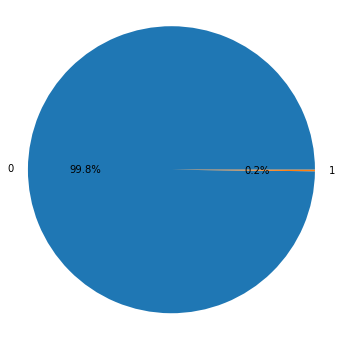

In [11]:
plt.figure(figsize=(15,6))
lst=[284315,492]
lbs=[0,1]
plt.pie(lst,labels=lbs,autopct='%1.1f%%',radius=1.1)
plt.show()

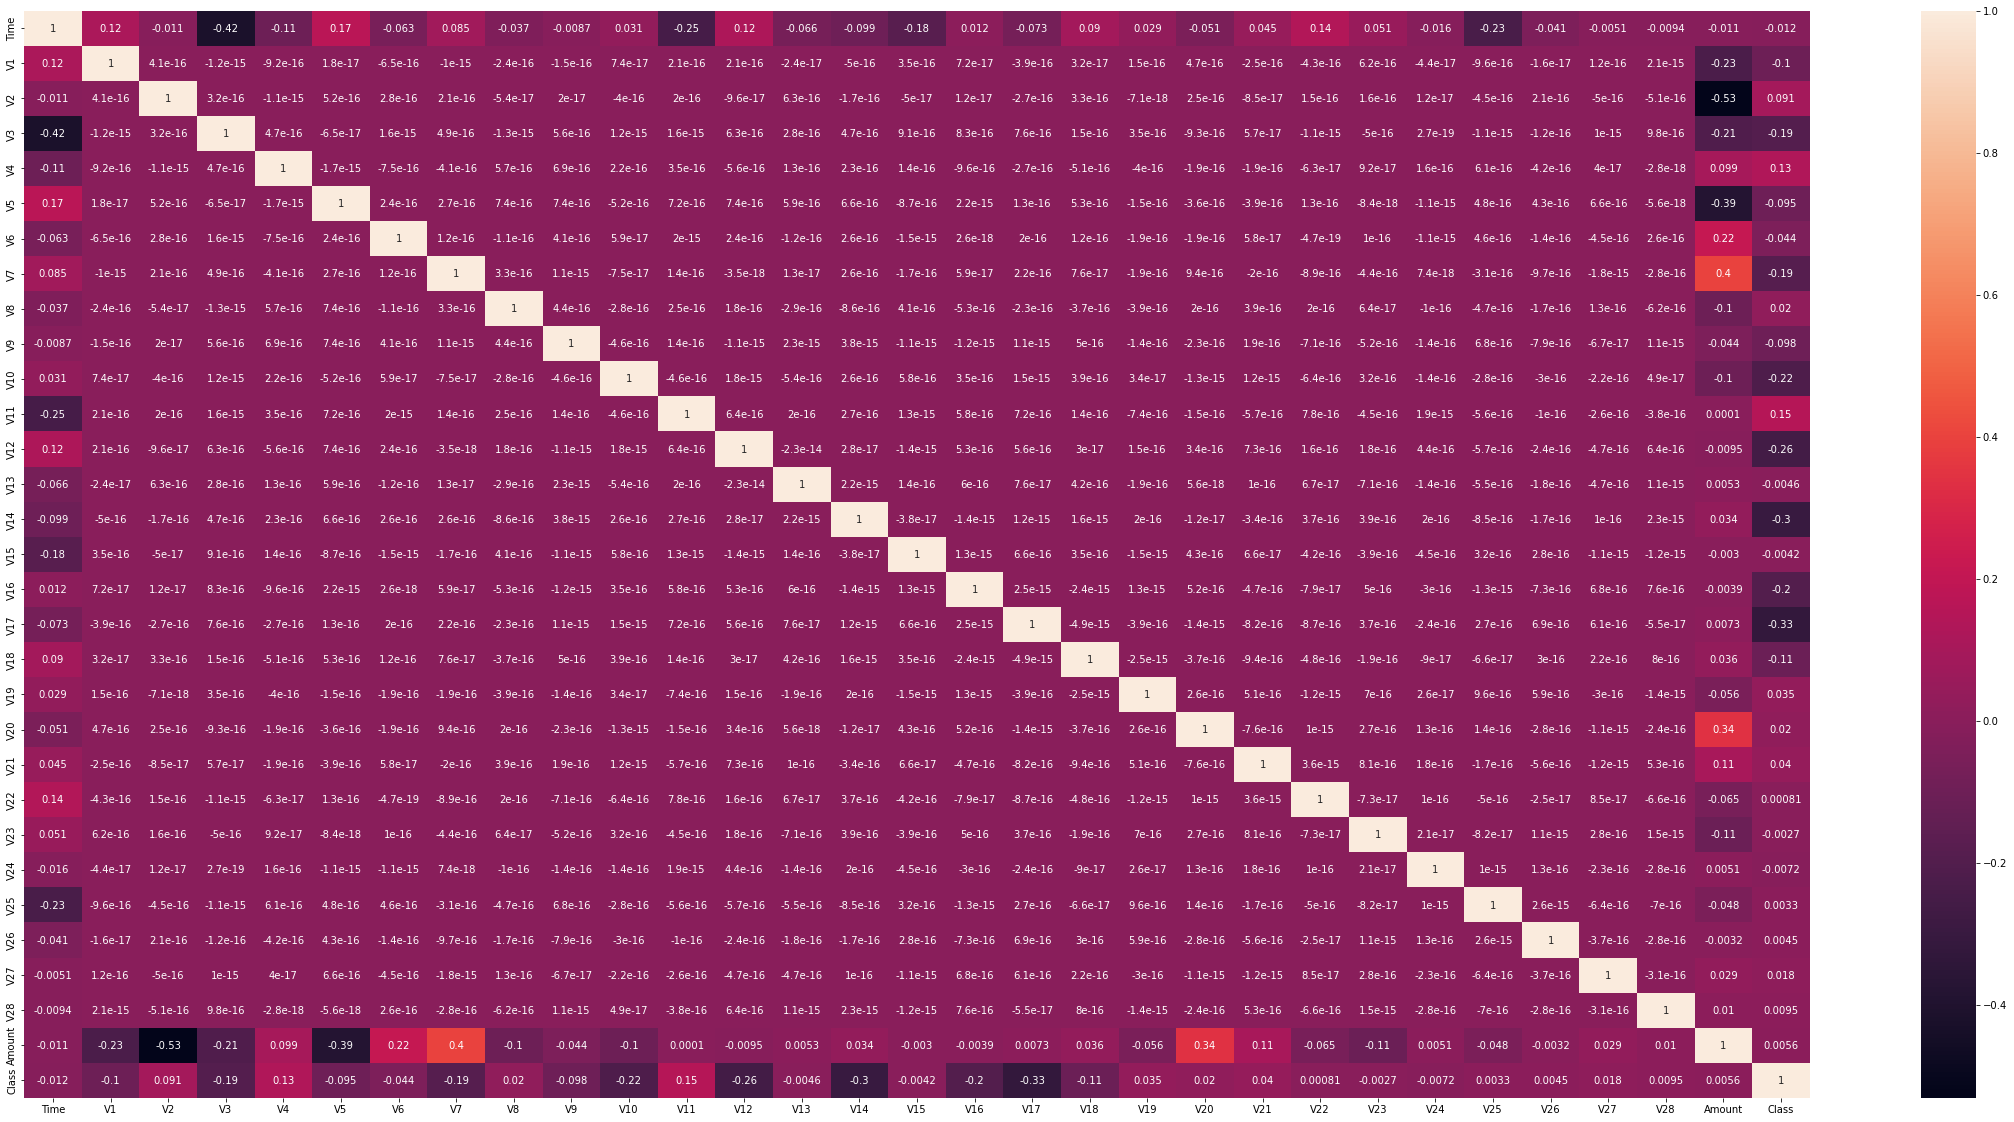

In [12]:
plt.figure(figsize=(40,20))
sn.heatmap(df.corr(),annot=True)
plt.show()

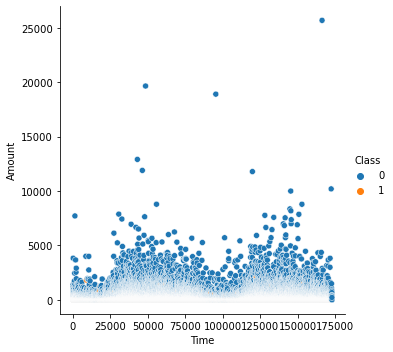

In [13]:
sn.relplot(x='Time',y='Amount',data=df1,hue='Class')
plt.show()

In [14]:
column=df.columns

In [15]:
cont=['Time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

In [16]:
def conti(val):
    fig, ax = plt.subplots(1, 2, figsize=(18,4))

    Val_Amount = df[val].values
    Val_Time = df[val].values

    sn.boxplot(x=Val_Amount, ax=ax[0], color='r')
    ax[0].set_title(val, fontsize=14)
    ax[0].set_xlim([min(Val_Amount), max(Val_Amount)])

    sn.distplot(Val_Time, ax=ax[1], color='b')
    ax[1].set_title(val, fontsize=14)
    ax[1].set_xlim([min(Val_Time), max(Val_Time)])

    plt.show()

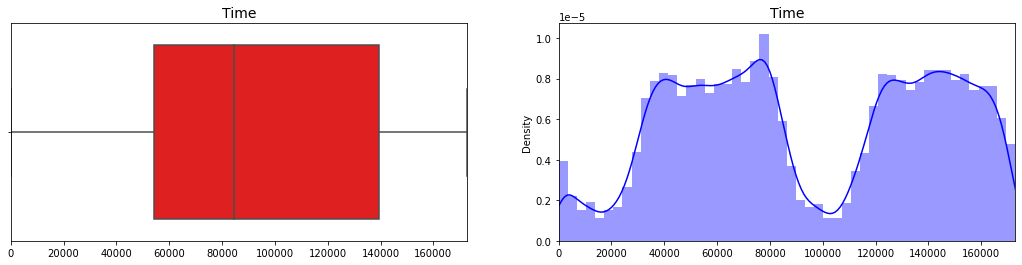

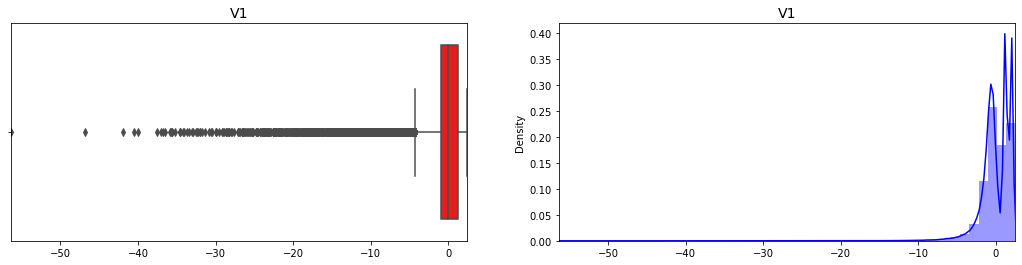

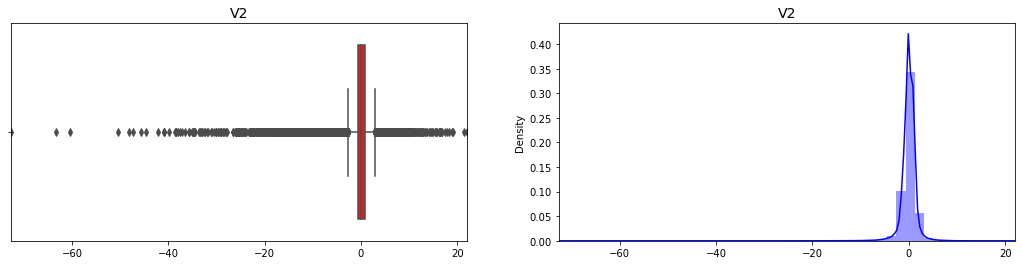

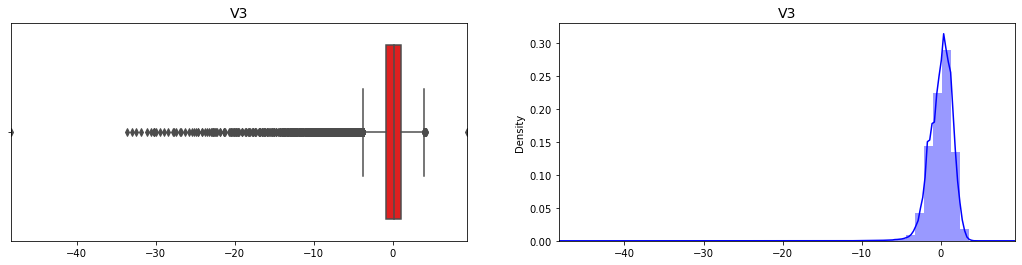

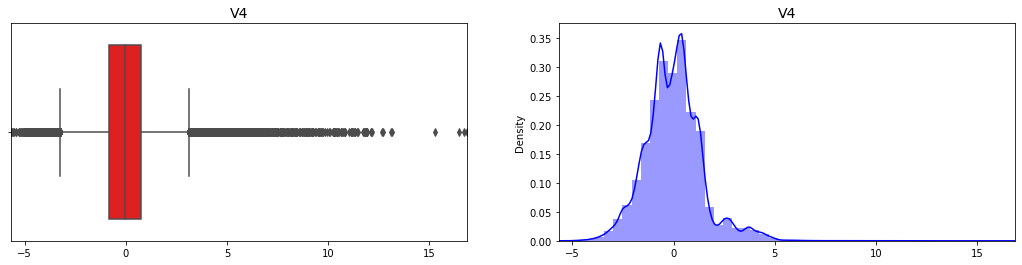

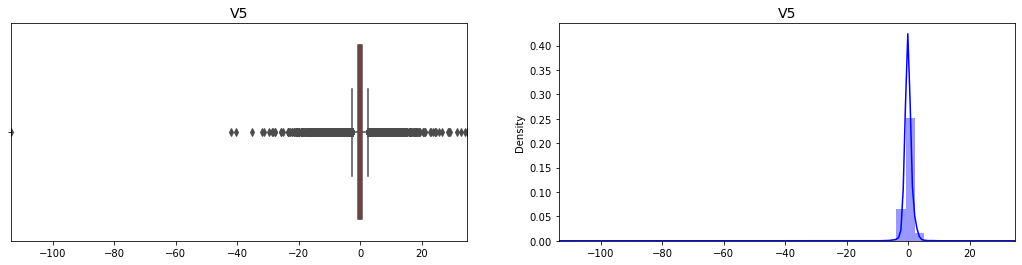

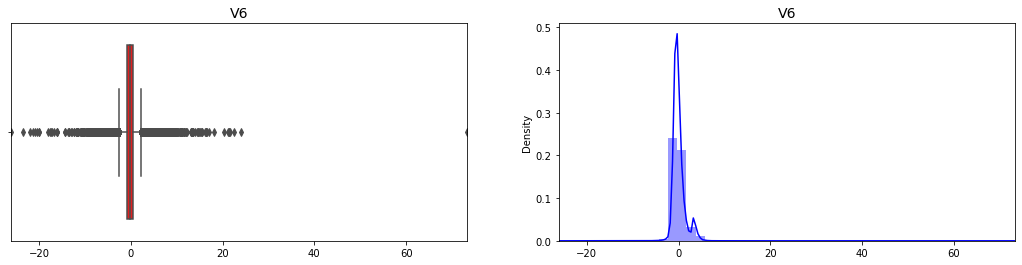

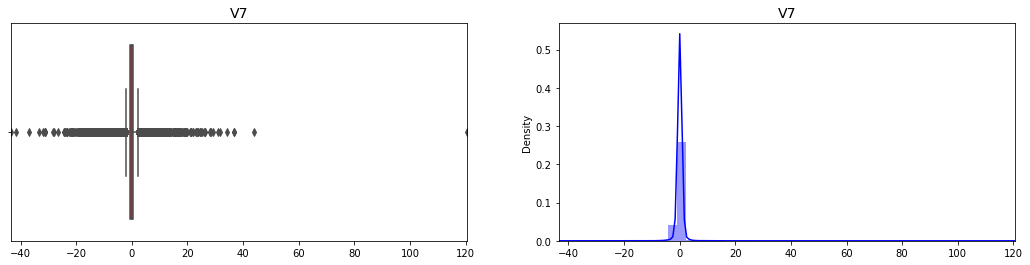

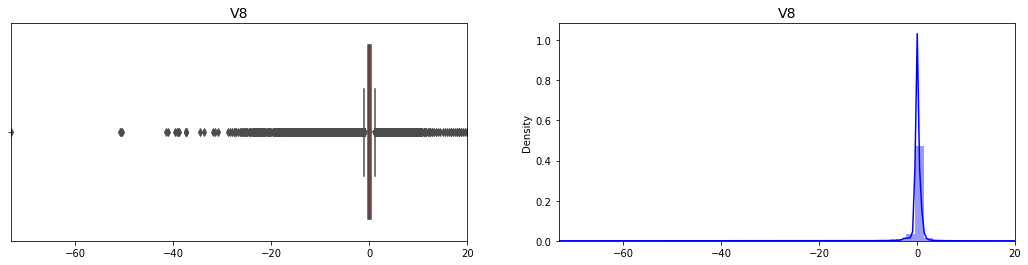

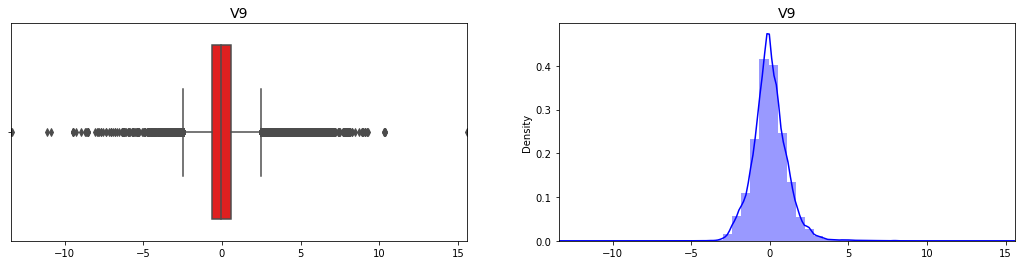

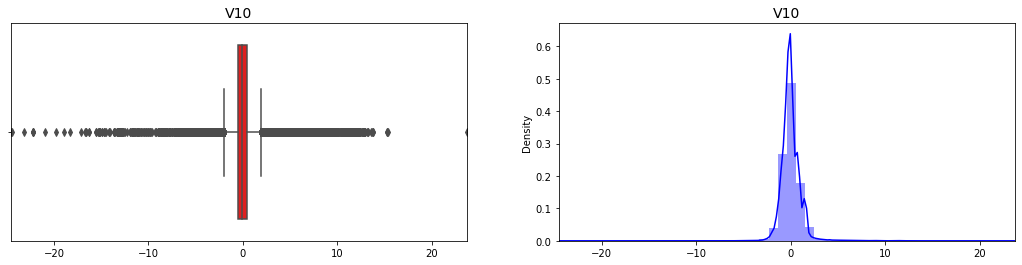

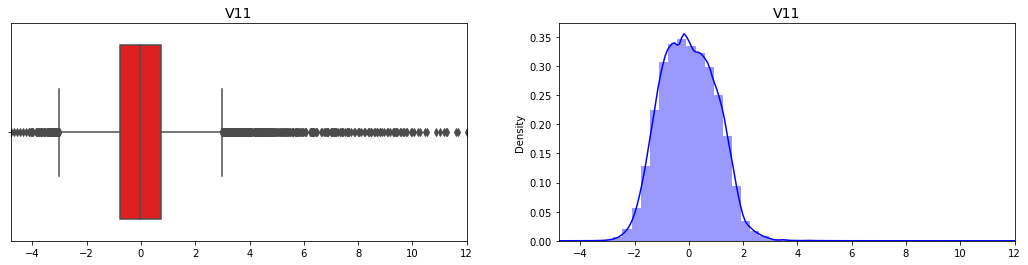

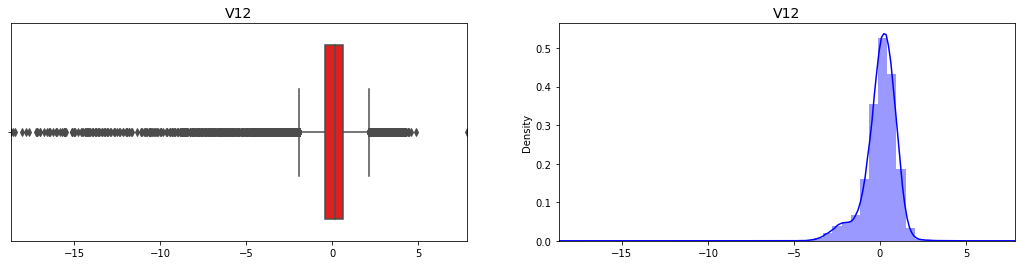

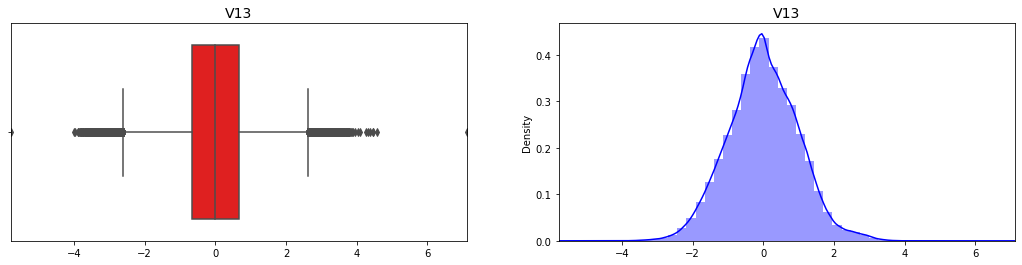

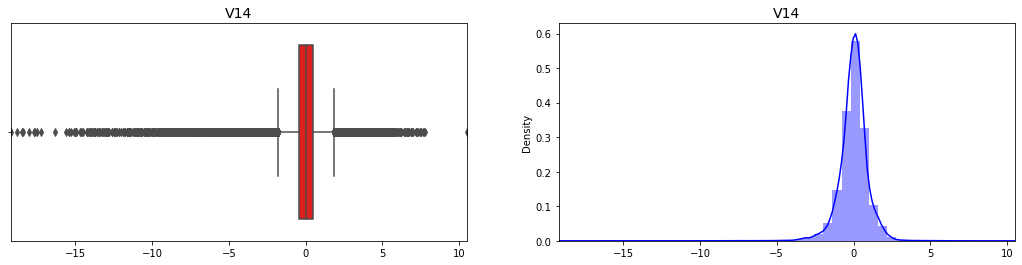

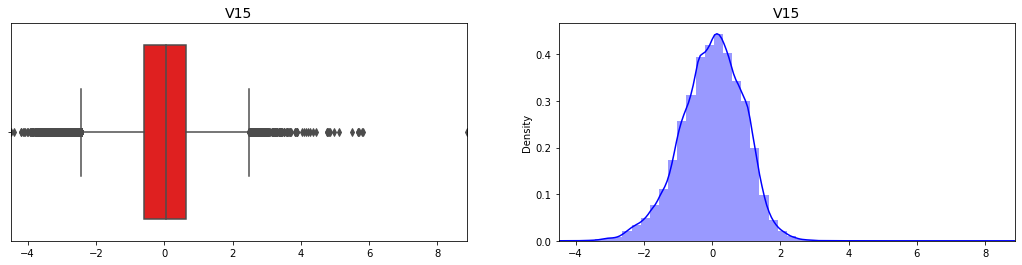

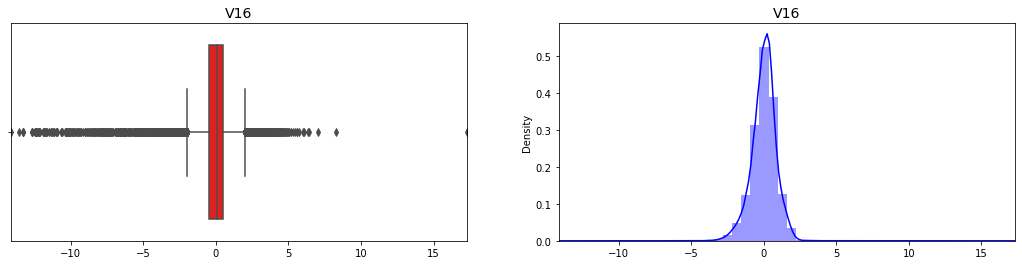

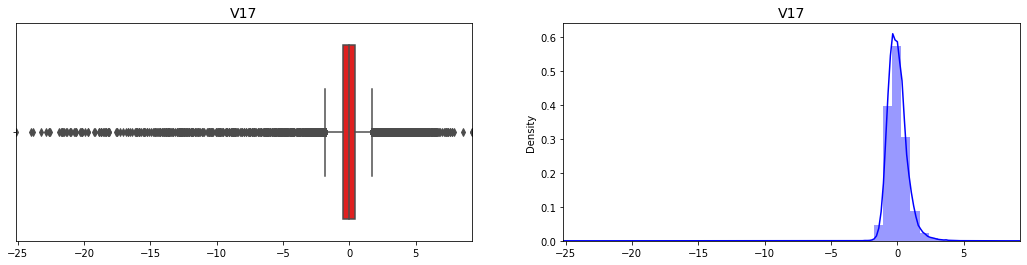

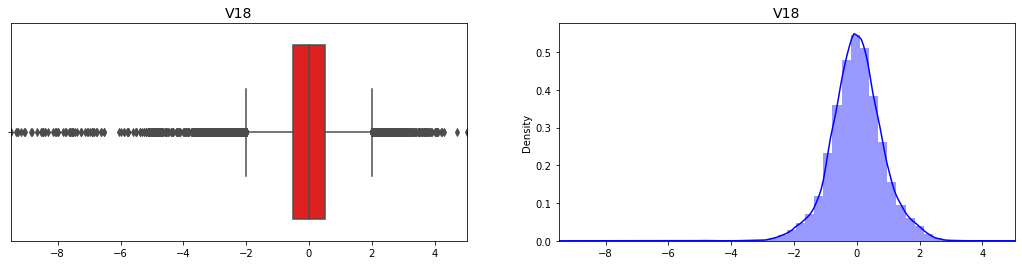

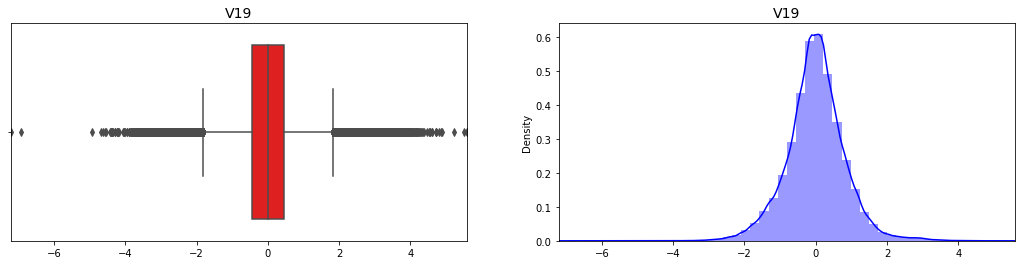

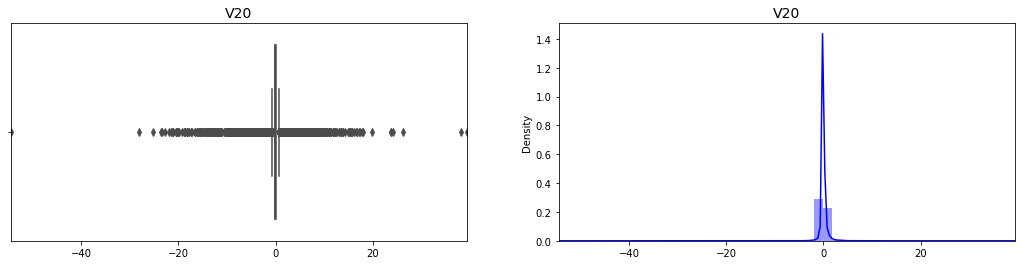

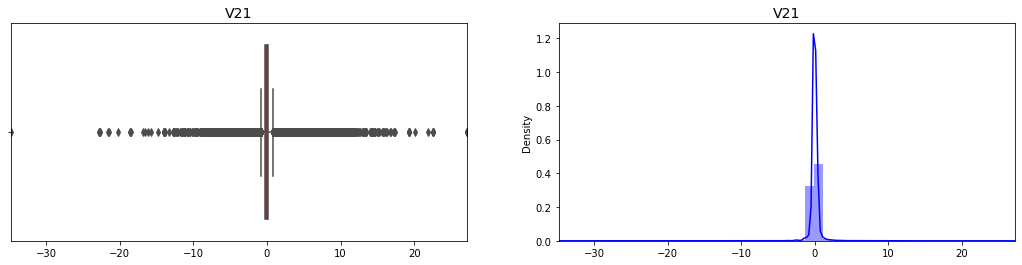

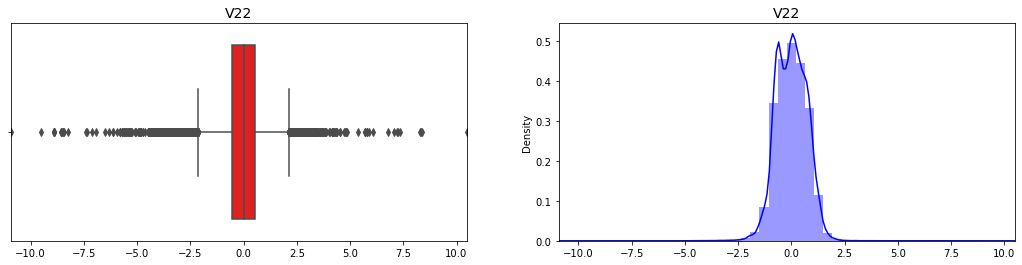

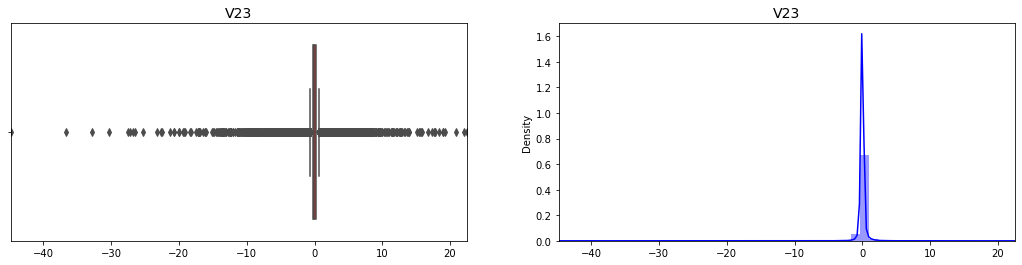

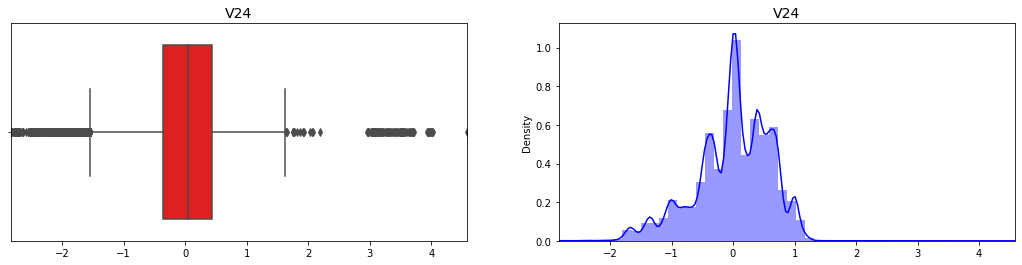

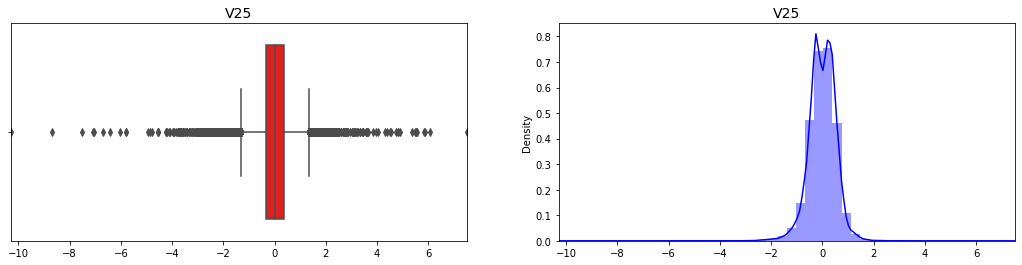

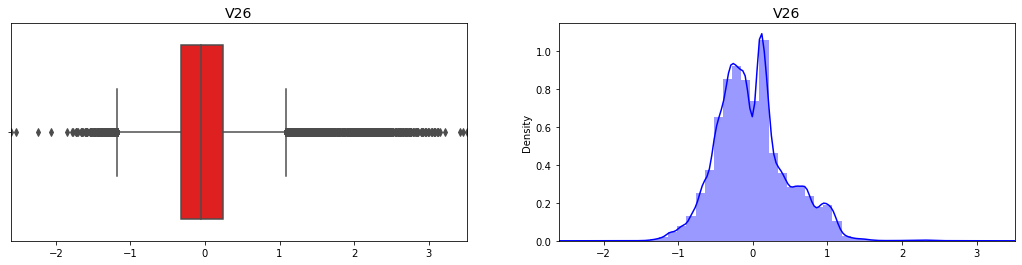

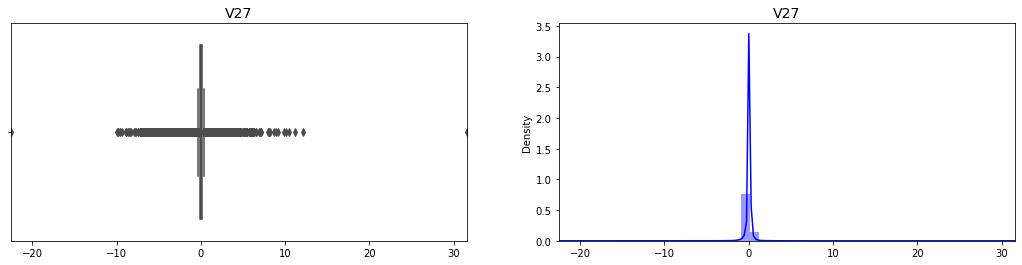

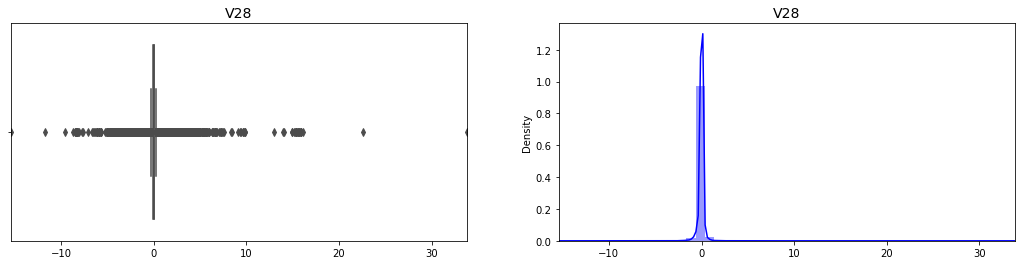

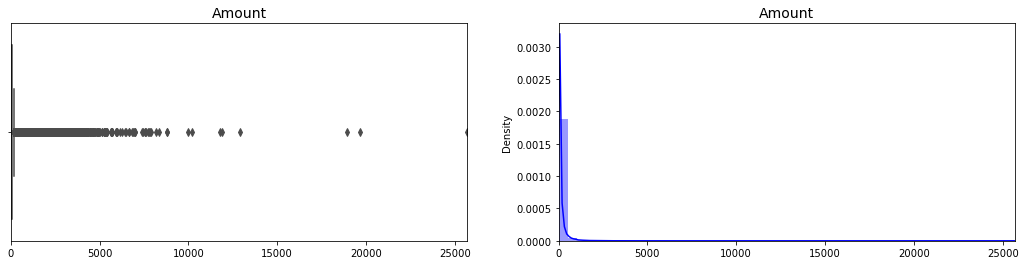

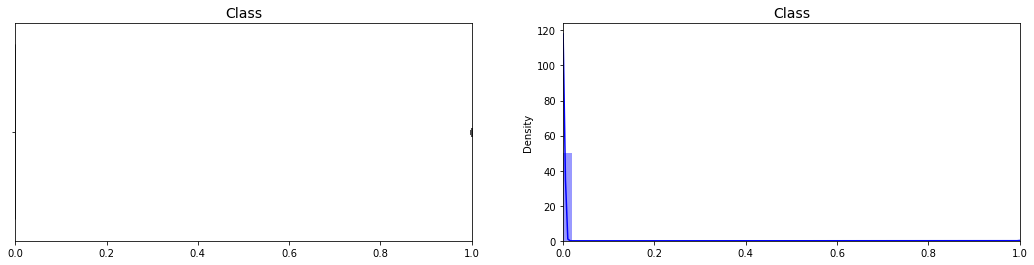

In [17]:
for val in cont:
    conti(val)

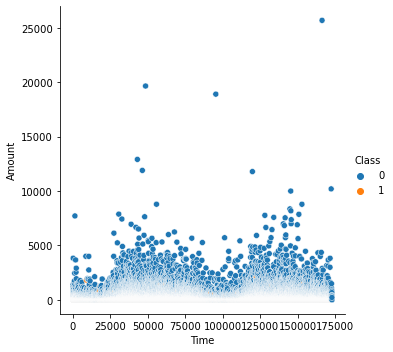

In [18]:
sn.relplot(x='Time',y='Amount',data=df1,hue='Class')
plt.show()

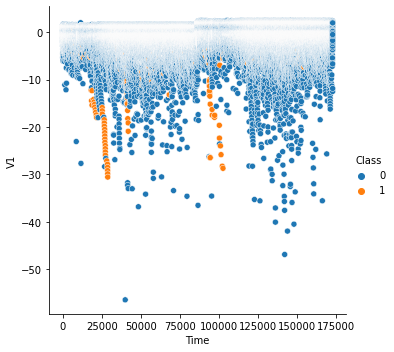

In [19]:
sn.relplot(x='Time',y='V1',data=df1,hue='Class')
plt.show()

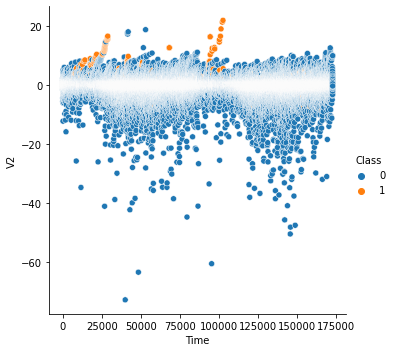

In [20]:
sn.relplot(x='Time',y='V2',data=df1,hue='Class')

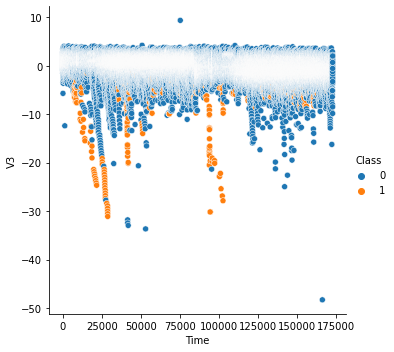

In [21]:
sn.relplot(x='Time',y='V3',data=df1,hue='Class')

# BIVARIATE ANALYSIS

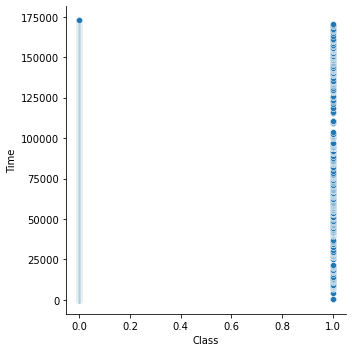

In [22]:
sn.relplot(x='Class',y='Time',data=df1)
plt.show()

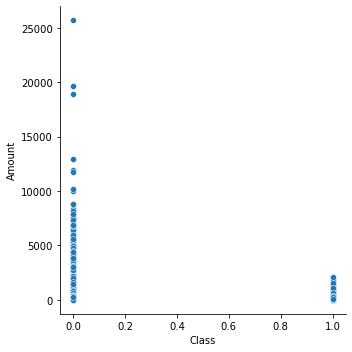

In [23]:
sn.relplot(x='Class',y='Amount',data=df1)
plt.show()

In [24]:
def boxplot(val):
    fig, ax = plt.subplots(1, 2, figsize=(18,4))
    
    print(val,"vs Class")
    sn.boxplot(x='Class',y=val,data=df,ax=ax[0])

    
    sn.violinplot(x="Class", y=val, data=df,ax=ax[1])
    
def kdeplot(val):
    fig = sn.FacetGrid(data=df, hue="Class", aspect=4)
    fig.map(sn.kdeplot, val, shade=True)
    fig.add_legend()
    plt.show()
    print('*'*120)

Time vs Class


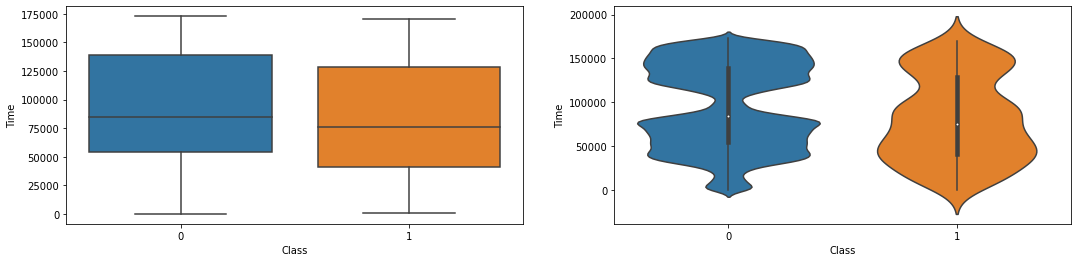

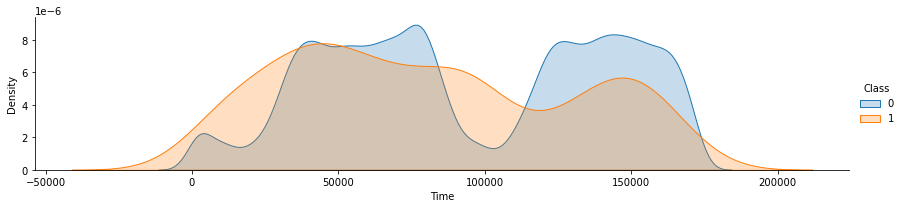

************************************************************************************************************************


In [25]:
val="Time"
boxplot(val)
kdeplot(val)

Amount vs Class


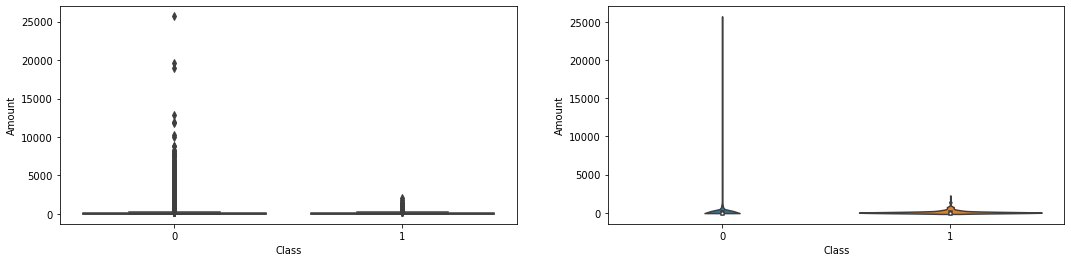

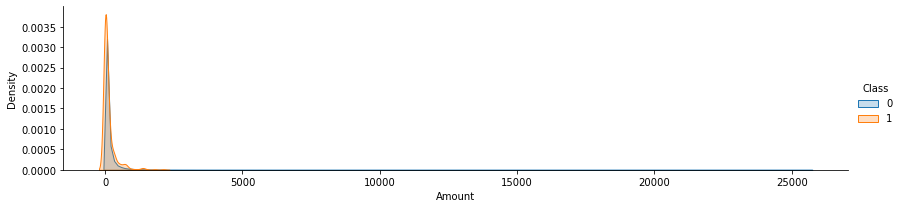

************************************************************************************************************************


In [26]:
val="Amount"
boxplot(val)
kdeplot(val)

Time vs Class


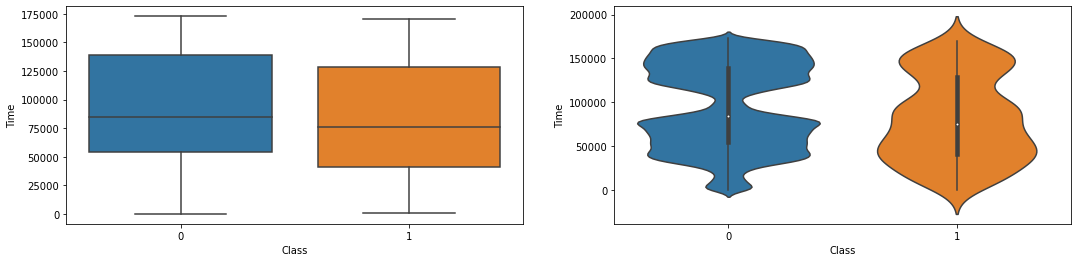

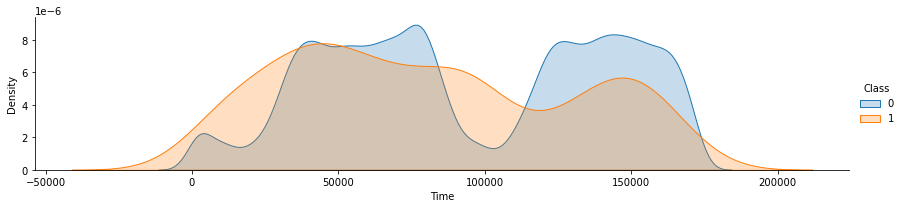

************************************************************************************************************************
V1 vs Class


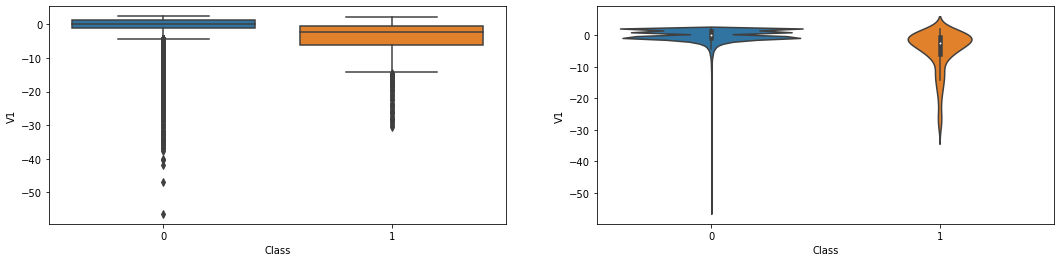

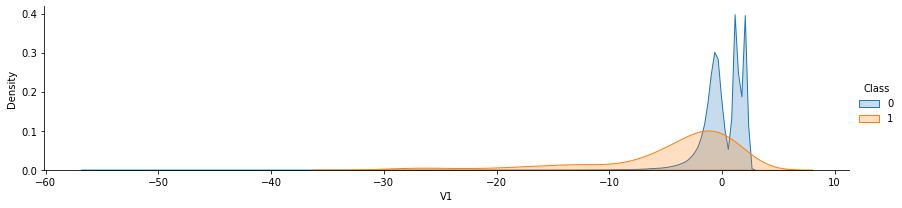

************************************************************************************************************************
V2 vs Class


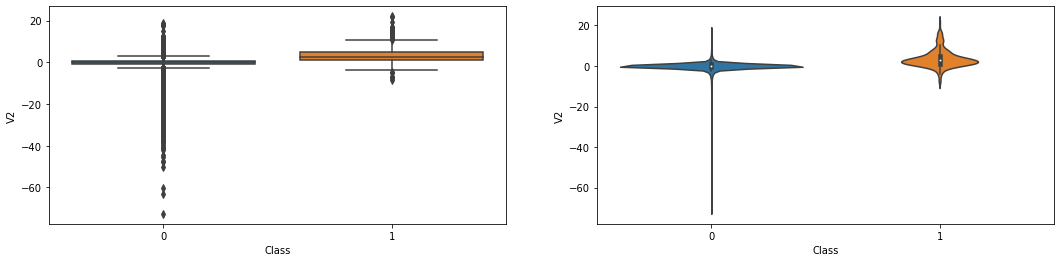

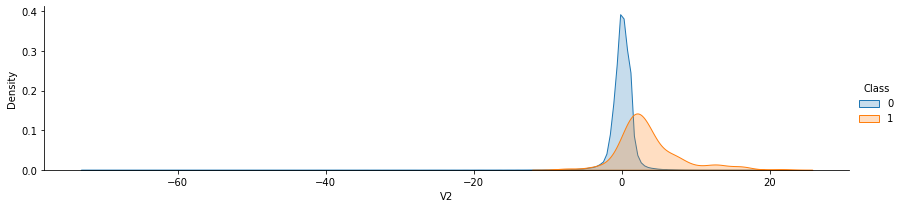

************************************************************************************************************************
V3 vs Class


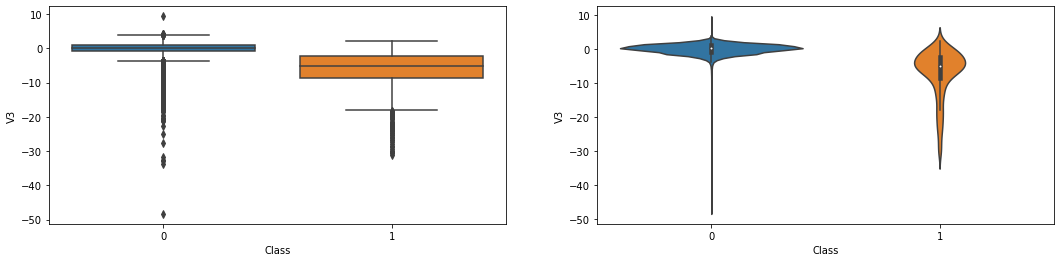

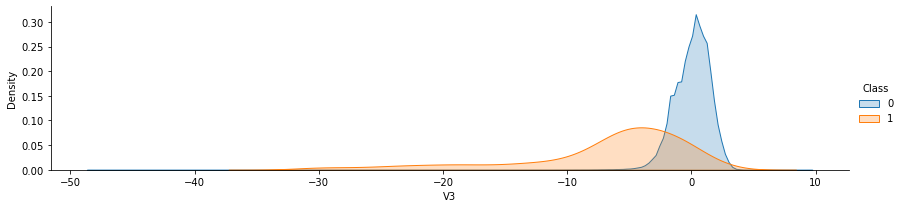

************************************************************************************************************************
V4 vs Class


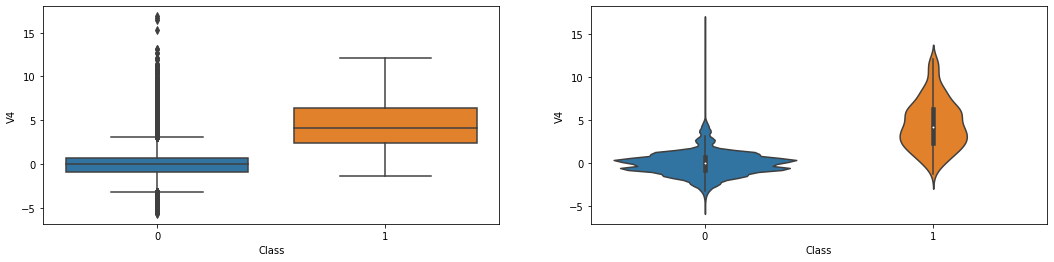

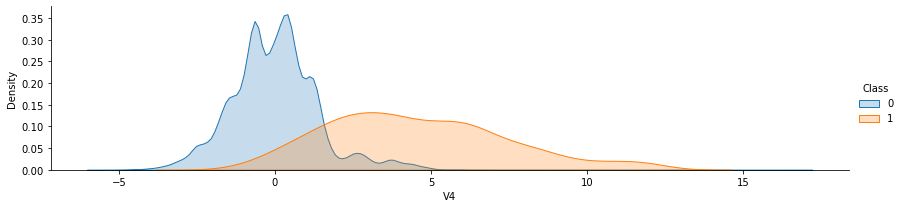

************************************************************************************************************************
V5 vs Class


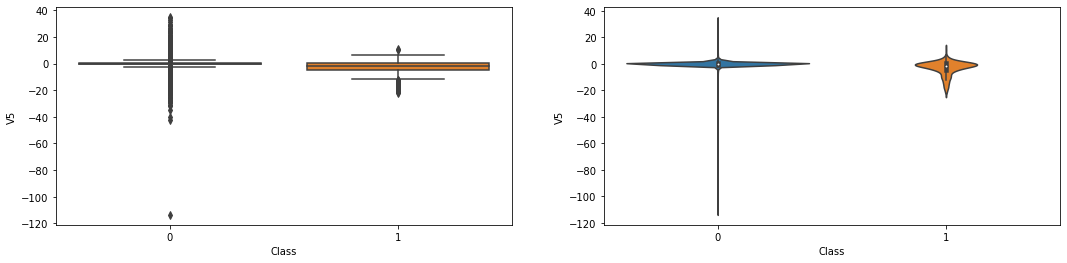

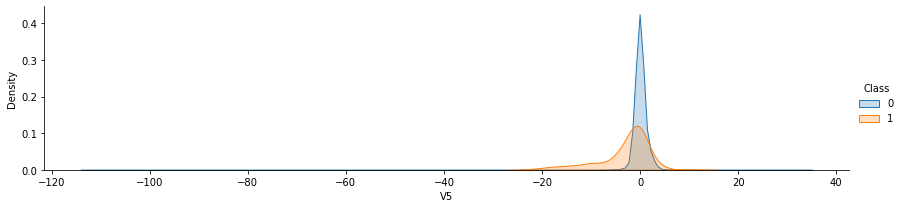

************************************************************************************************************************
V6 vs Class


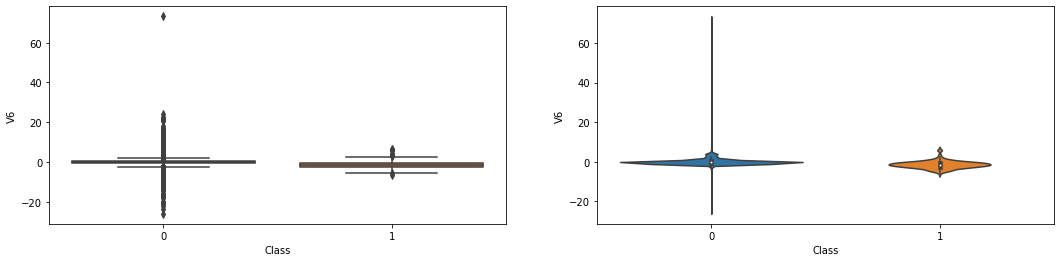

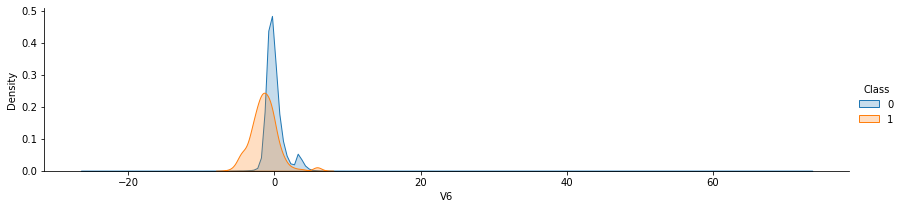

************************************************************************************************************************
V7 vs Class


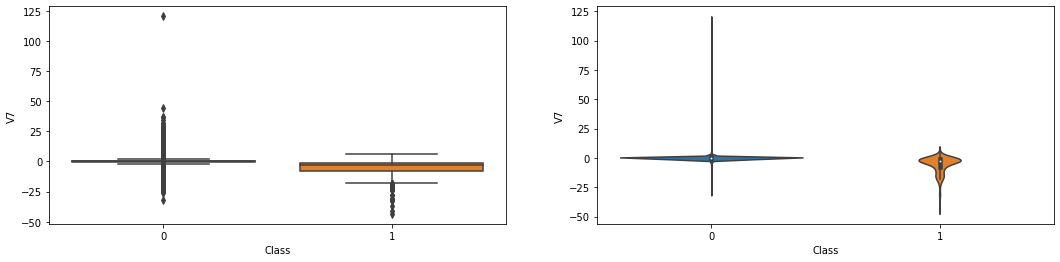

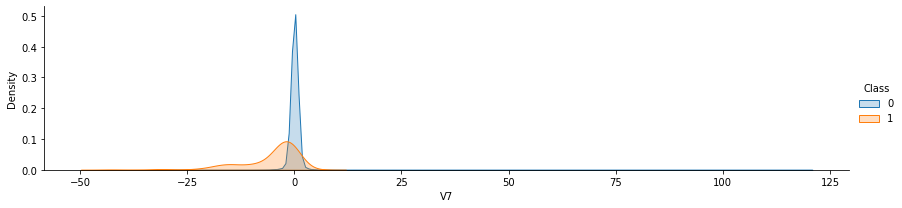

************************************************************************************************************************
V8 vs Class


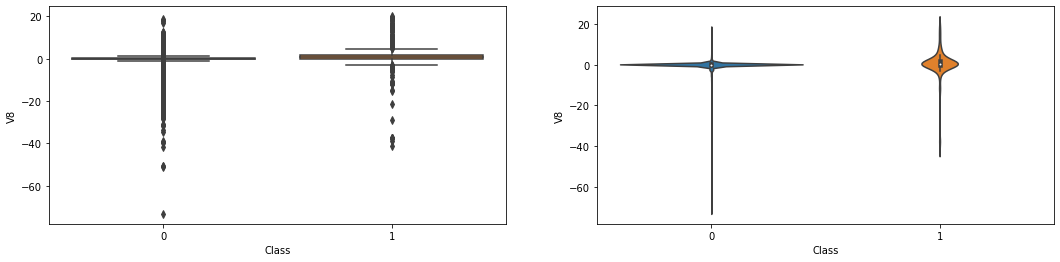

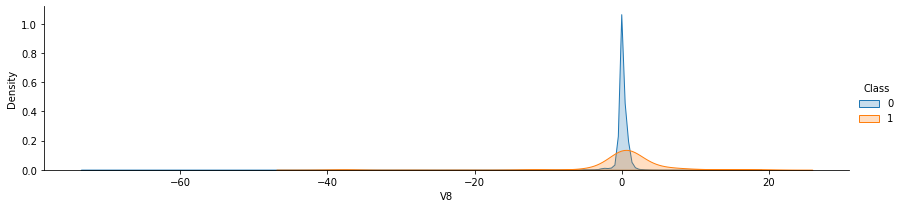

************************************************************************************************************************
V9 vs Class


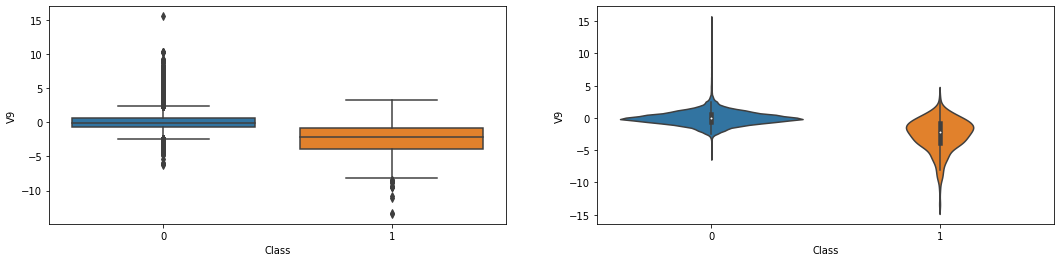

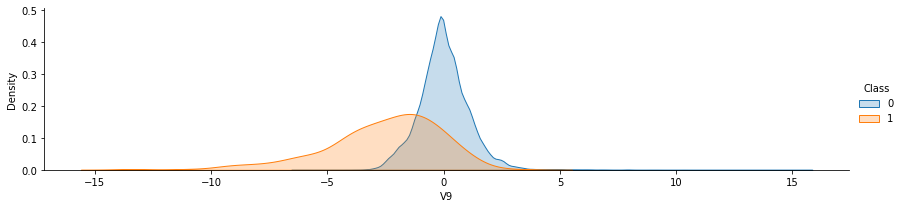

************************************************************************************************************************
V10 vs Class


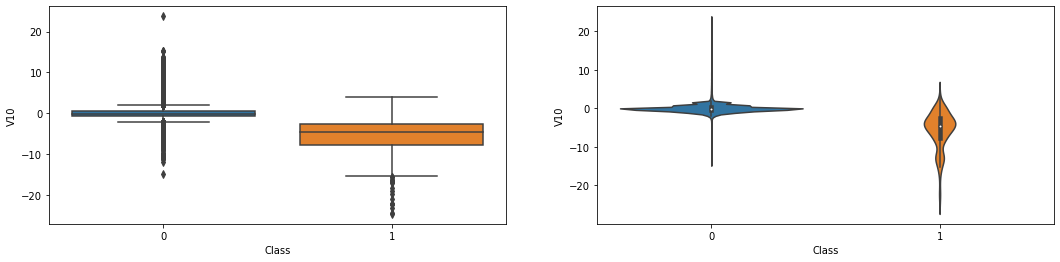

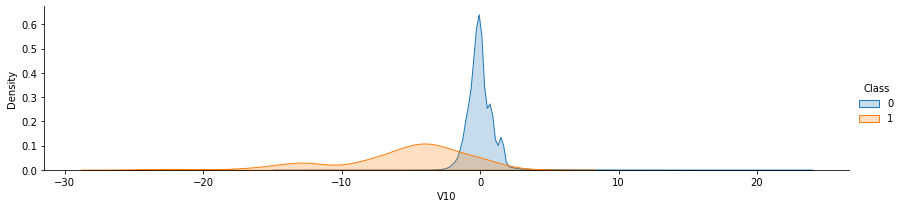

************************************************************************************************************************
V11 vs Class


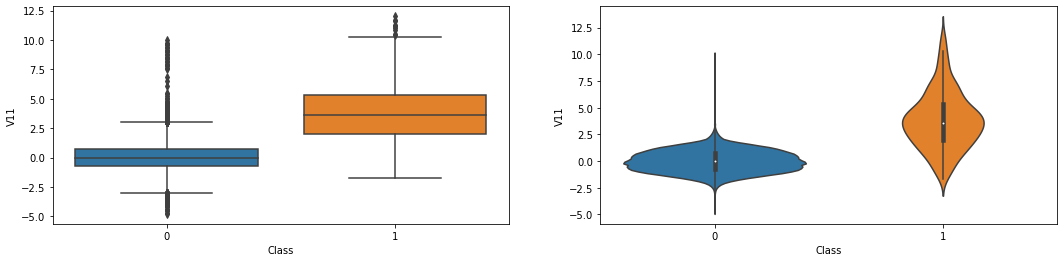

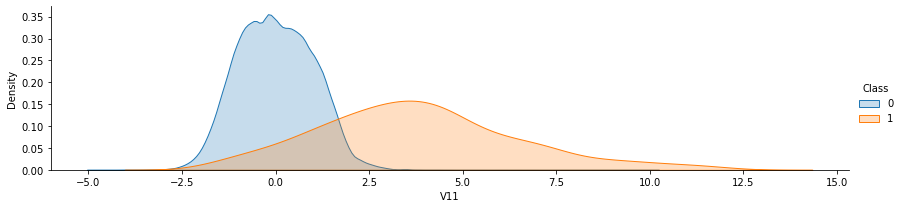

************************************************************************************************************************
V12 vs Class


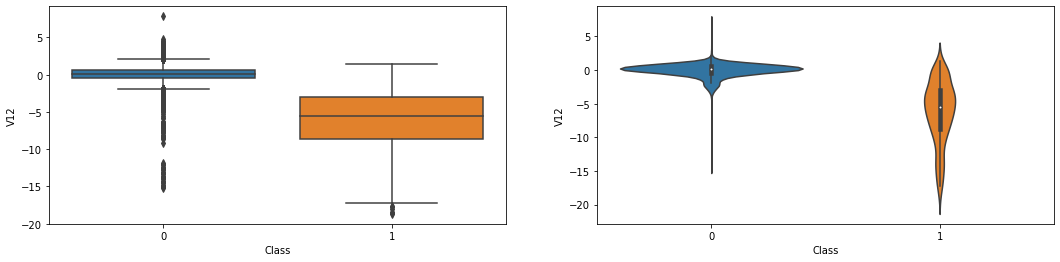

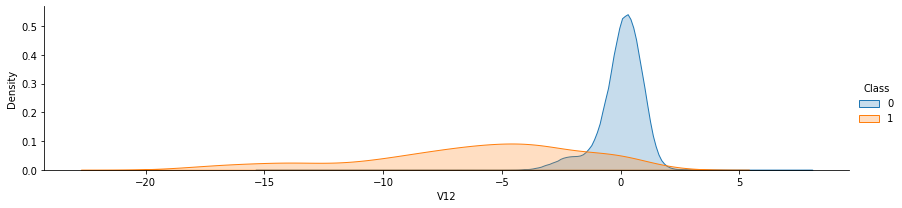

************************************************************************************************************************
V13 vs Class


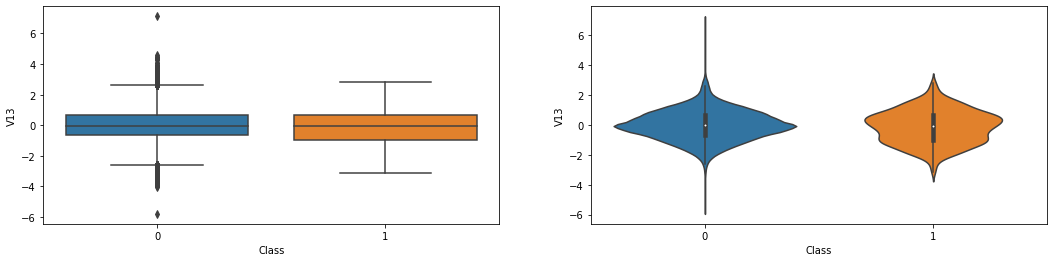

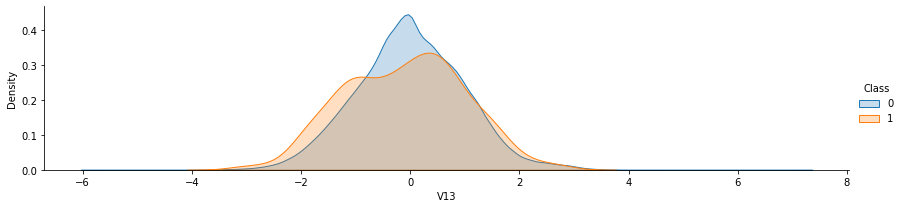

************************************************************************************************************************
V14 vs Class


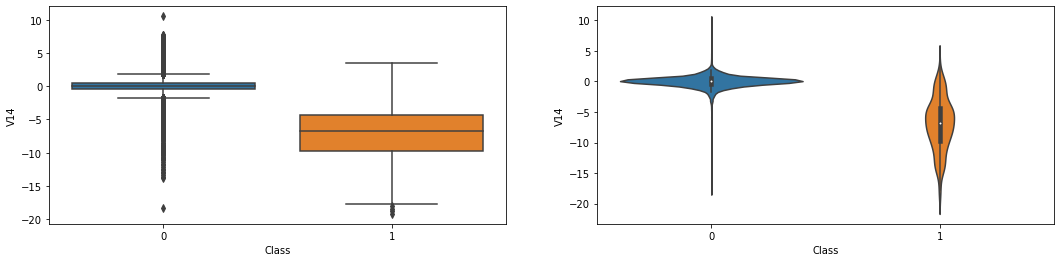

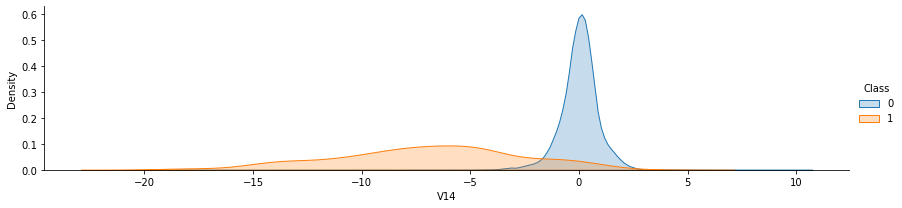

************************************************************************************************************************
V15 vs Class


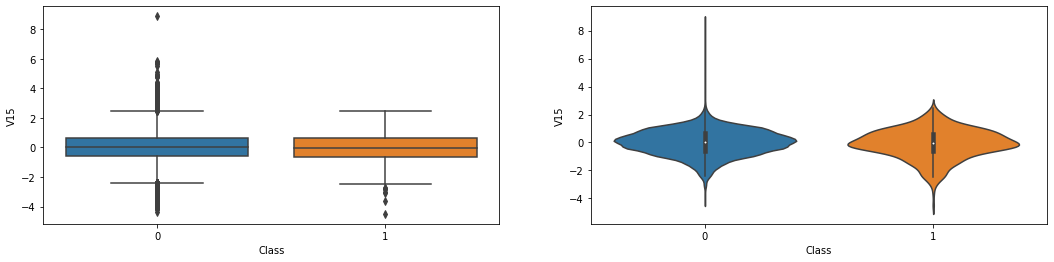

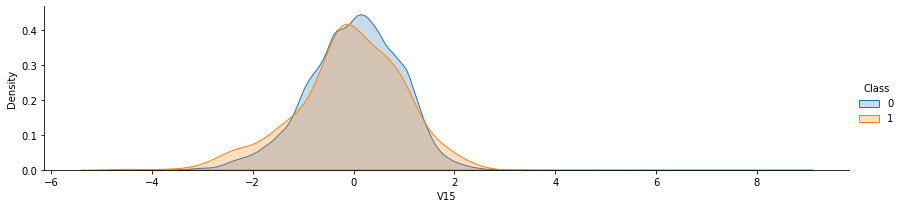

************************************************************************************************************************
V16 vs Class


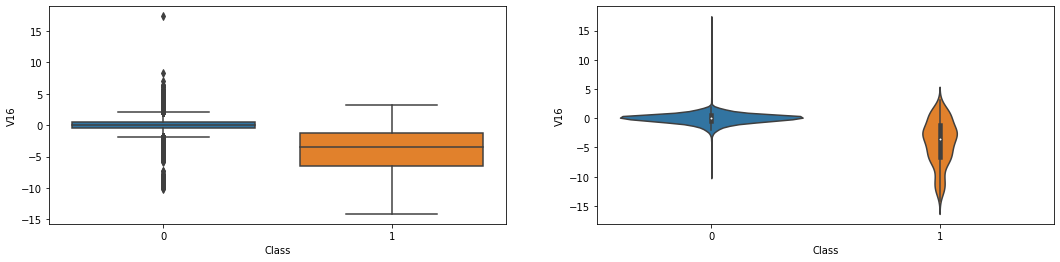

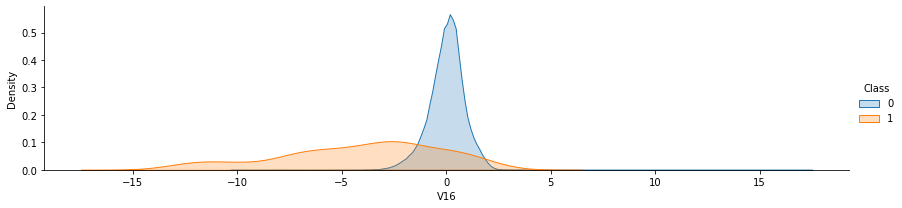

************************************************************************************************************************
V17 vs Class


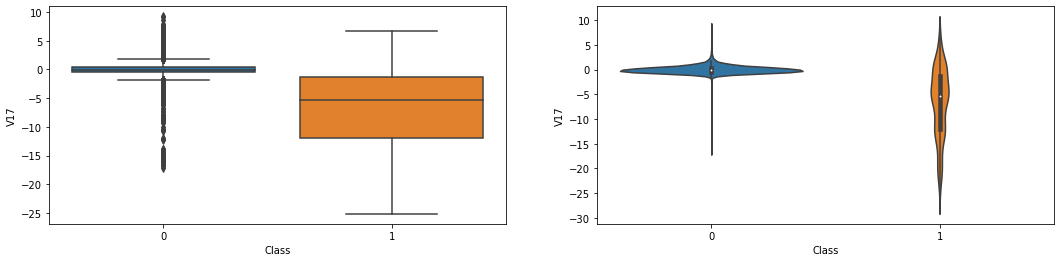

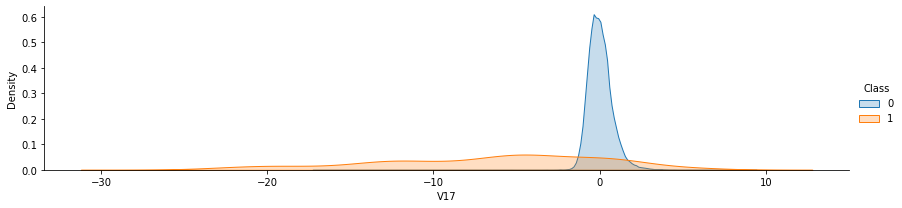

************************************************************************************************************************
V18 vs Class


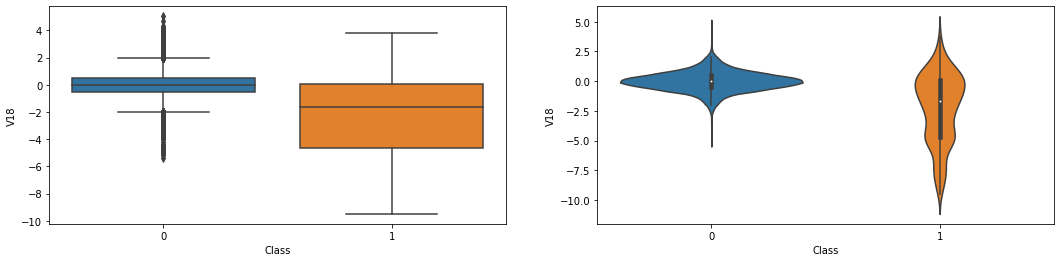

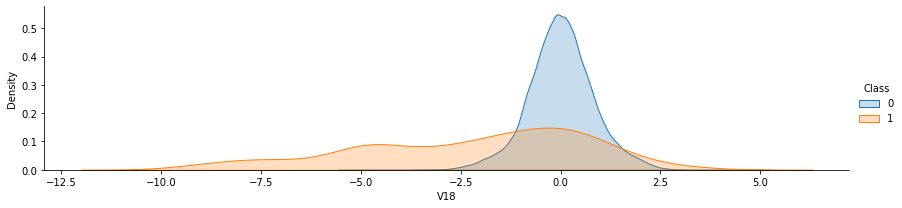

************************************************************************************************************************
V19 vs Class


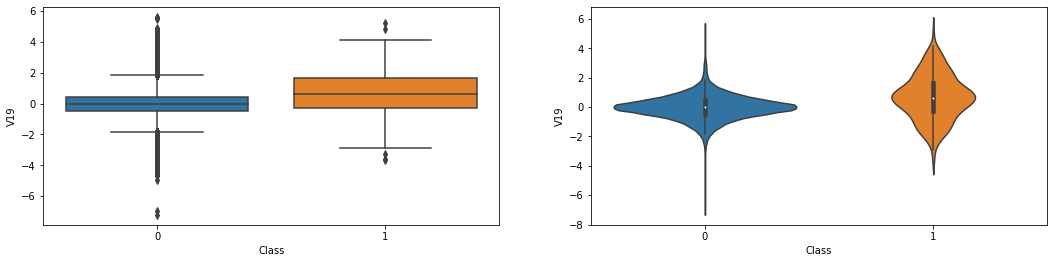

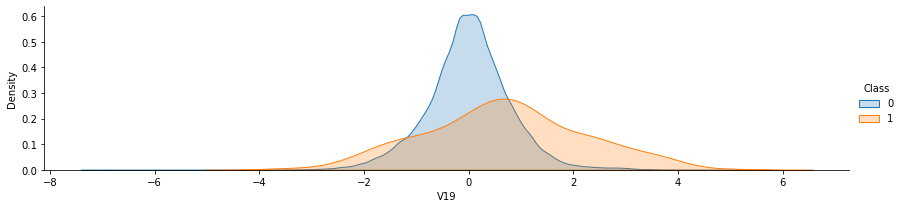

************************************************************************************************************************
V20 vs Class


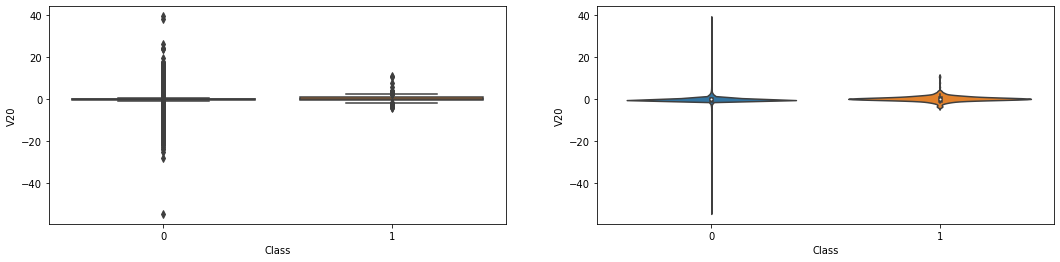

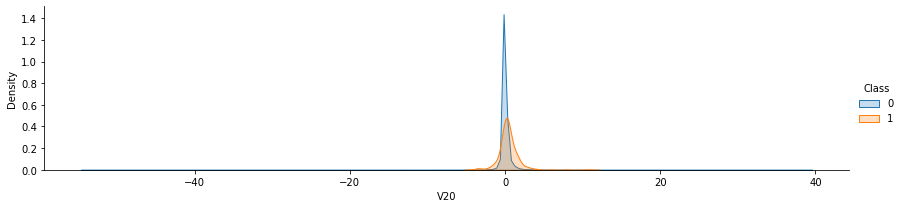

************************************************************************************************************************
V21 vs Class


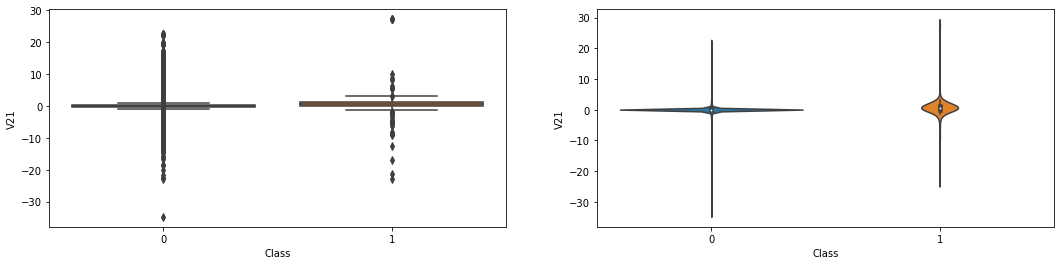

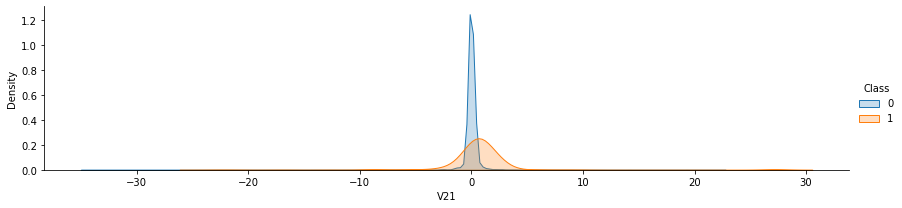

************************************************************************************************************************
V22 vs Class


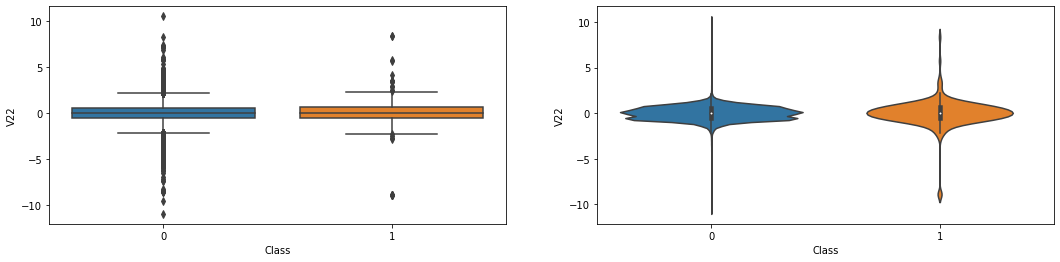

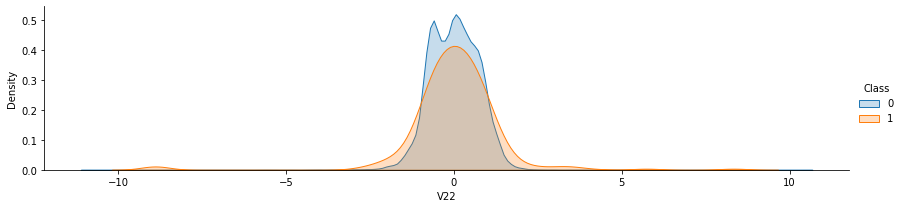

************************************************************************************************************************
V23 vs Class


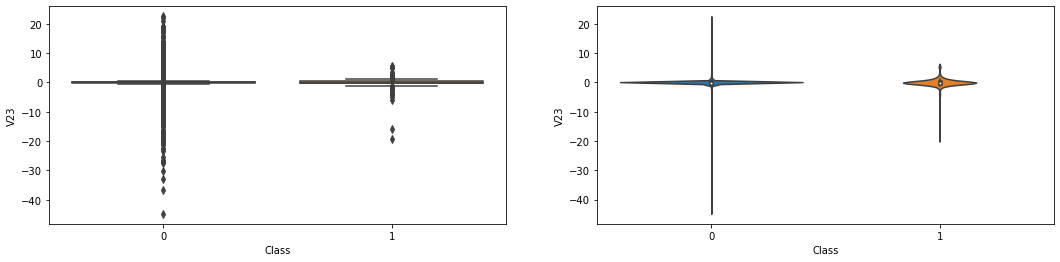

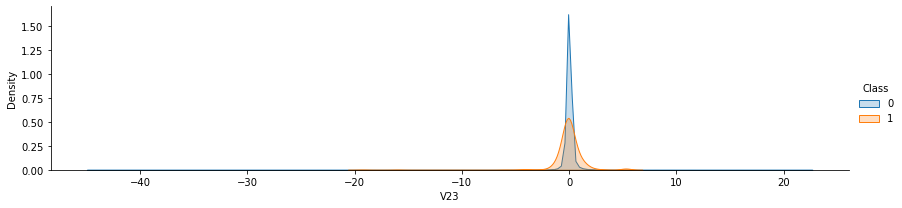

************************************************************************************************************************
V24 vs Class


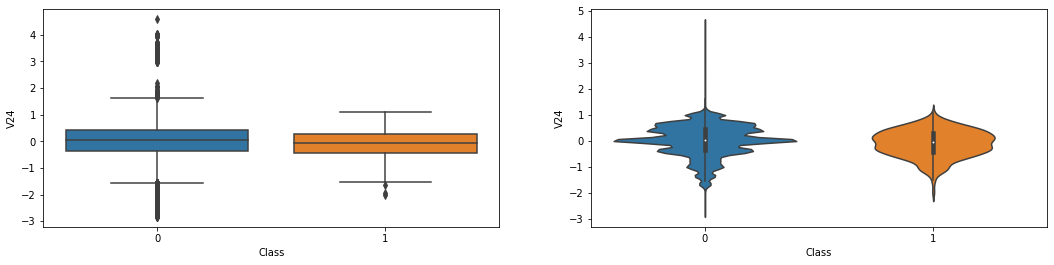

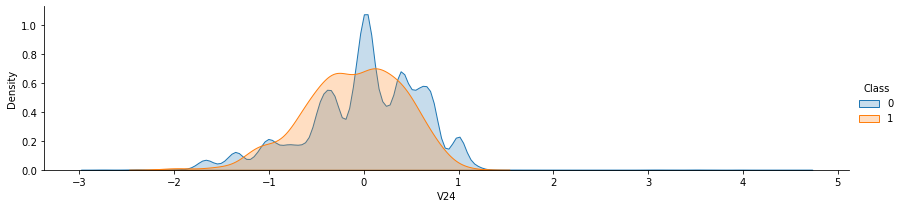

************************************************************************************************************************
V25 vs Class


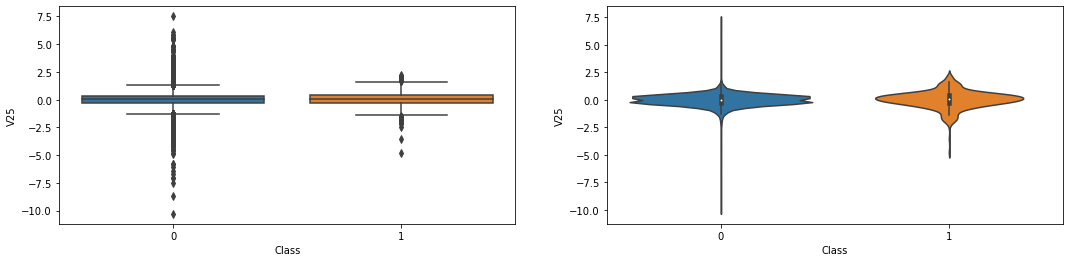

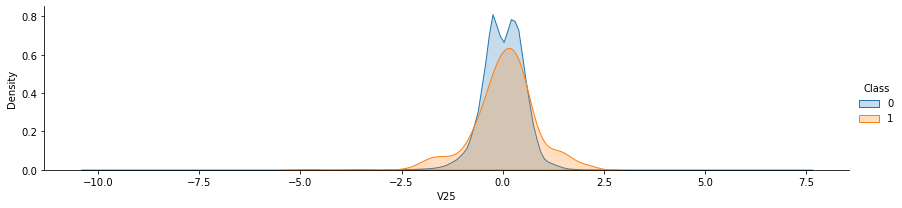

************************************************************************************************************************
V26 vs Class


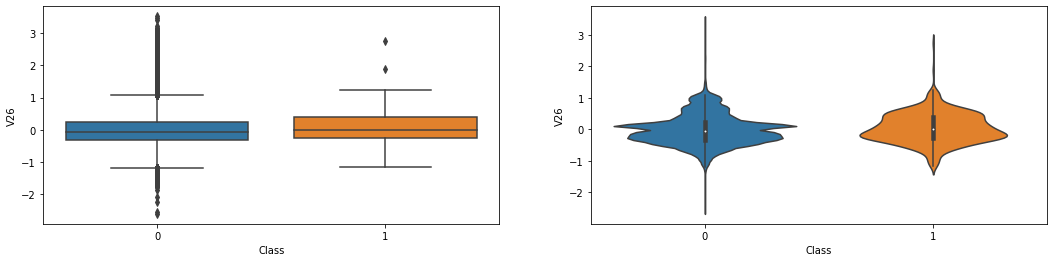

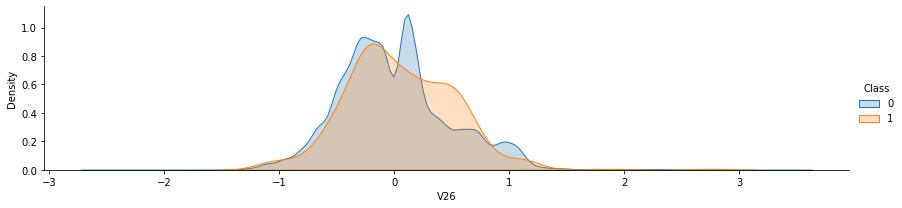

************************************************************************************************************************
V27 vs Class


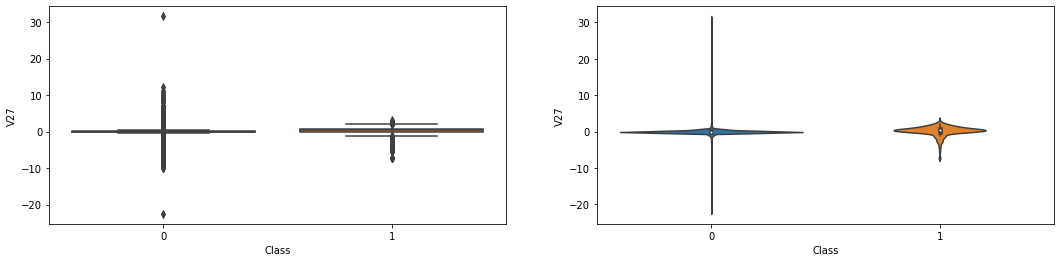

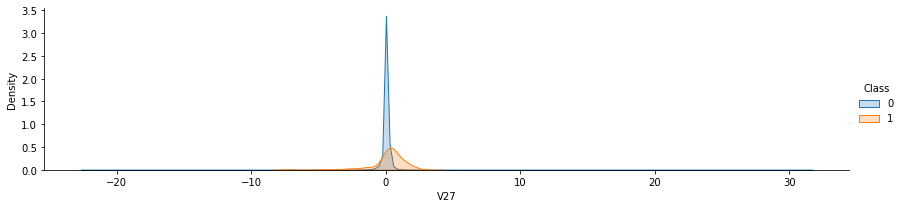

************************************************************************************************************************
V28 vs Class


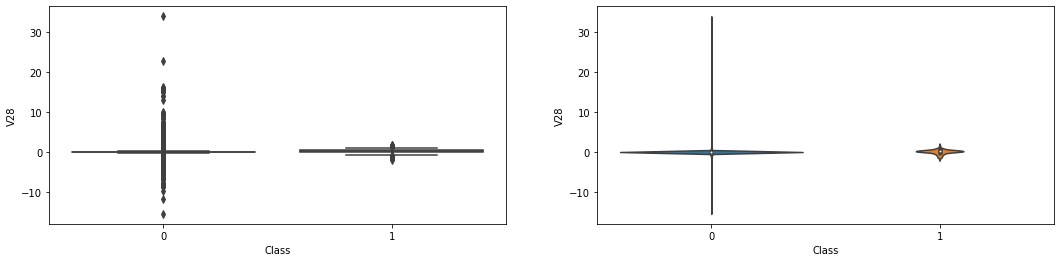

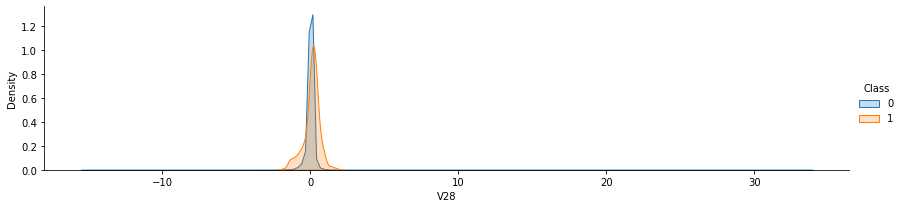

************************************************************************************************************************
Amount vs Class


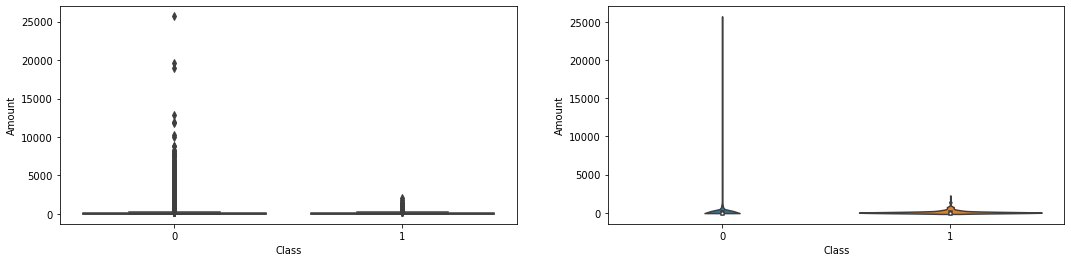

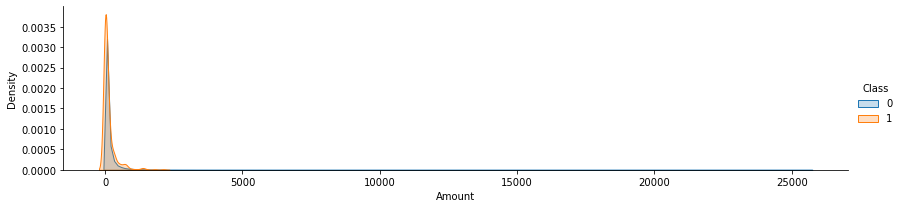

************************************************************************************************************************
Class vs Class


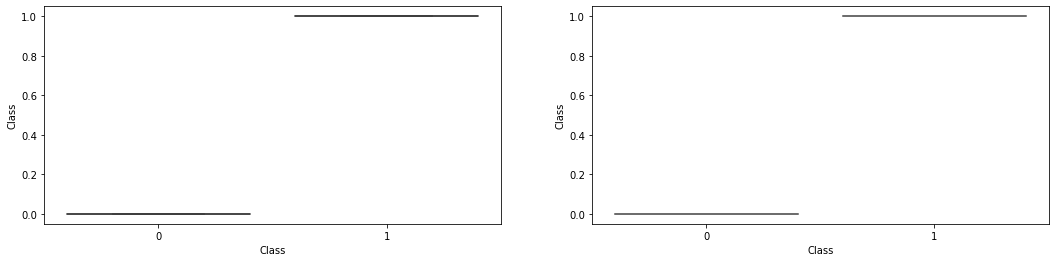

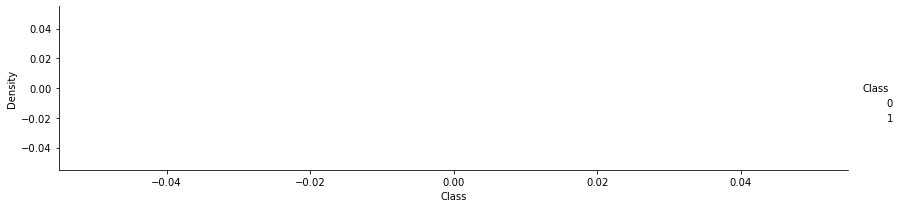

************************************************************************************************************************


In [27]:
for i in column:
    val=i
    boxplot(val)
    kdeplot(val)

In [28]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [29]:
q3=df['Amount'].quantile(0.75)
q1=df['Amount'].quantile(0.25)
iqr=df['Amount'].quantile(0.75)-df['Amount'].quantile(0.25)
low_limit=q1-(iqr*1.5)
upp_limit=q3+(iqr*1.5)
print('Amount',':minimum_iqr =',round(low_limit,3),'|MINIMUM value',round(df['Amount'].min(),3),
      '|Maximum_iqr =',round(upp_limit,3),'|MAX value',round(df['Amount'].max(),3))
print('*'*80)

Amount :minimum_iqr = -101.748 |MINIMUM value 0.0 |Maximum_iqr = 184.512 |MAX value 25691.16
********************************************************************************


In [30]:
for i in range(0,283726 ):
    if ((df['Amount'][i]==0) & (df['Class'][i]==1)):
        df['Amount'][i]=184.375

# Dropping Duplicates

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
X=df.drop(columns=['Class'],axis=1)
Y=df['Class']

# Over Sampling

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
sm = SMOTE()
X_oversampled, y_oversampled = sm.fit_resample(X, Y)

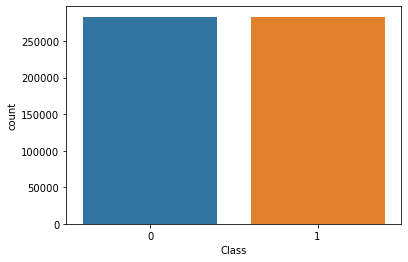

In [35]:
sn.countplot(x = y_oversampled, data = df)
plt.savefig('stroke_oversampled.png')

# UNDER SAMPALING

In [36]:
from imblearn.under_sampling import NearMiss

In [37]:
NM = NearMiss()
X_undersampled, y_undersampled = NM.fit_resample(X, Y)

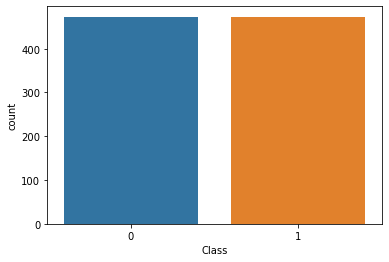

In [38]:
sn.countplot(x = y_undersampled, data = df)
plt.savefig('stroke_oversampled.png')

# After Smoting Graphs

In [39]:
def conti_u(val):
    fig, ax = plt.subplots(1, 2, figsize=(18,4))

    Val_Amount = X_undersampled[val].values
    Val_Time = X_undersampled[val].values

    sn.boxplot(x=Val_Amount, ax=ax[0], color='r')
    ax[0].set_title(val, fontsize=14)
    ax[0].set_xlim([min(Val_Amount), max(Val_Amount)])

    sn.distplot(Val_Time, ax=ax[1], color='b')
    ax[1].set_title(val, fontsize=14)
    ax[1].set_xlim([min(Val_Time), max(Val_Time)])

    plt.show()

In [40]:
#under sampaling

def boxplot_u(val):
    fig, ax = plt.subplots(1, 2, figsize=(18,4))
    
    print(val,"vs Class")
    sn.boxplot(x=y_undersampled,y=val,data=X_undersampled,ax=ax[0])

    
    sn.violinplot(x=y_undersampled, y=val, data=X_undersampled,ax=ax[1])
    plt.show()
def kdeplot_u(val):
    fig = sn.FacetGrid(data=X_undersampled, hue=y_undersampled, aspect=4)
    fig.map(sn.kdeplot, val, shade=True)
    fig.add_legend()
    plt.show()
    print('*'*120)
    
    
    
#Over Sampaling
def boxploto(val):
    fig, ax = plt.subplots(1, 2, figsize=(18,4))
    
    print(val,"vs Class")
    sn.boxplot(x=y_oversampled,y=val,data=X_oversampled,ax=ax[0])

    
    sn.violinplot(x=y_oversampled, y=val, data=X_oversampled,ax=ax[1])
    
def kdeploto(val):
    fig = sn.FacetGrid(data=X_oversampled, hue=y_undersampled, aspect=4)
    fig.map(sn.kdeplot, val, shade=True)
    fig.add_legend()
    plt.show()
    print('*'*120)

In [41]:
colum=X_undersampled.columns

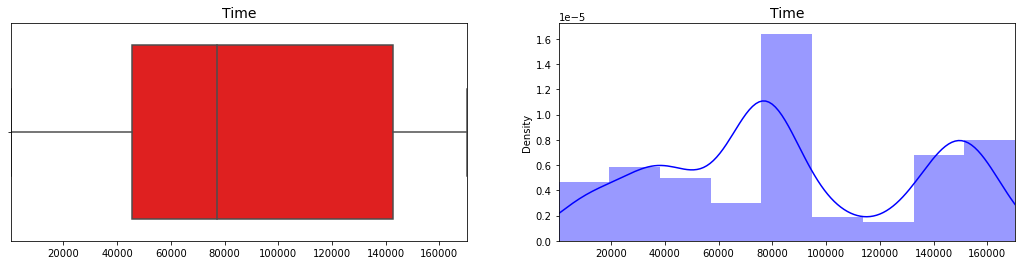

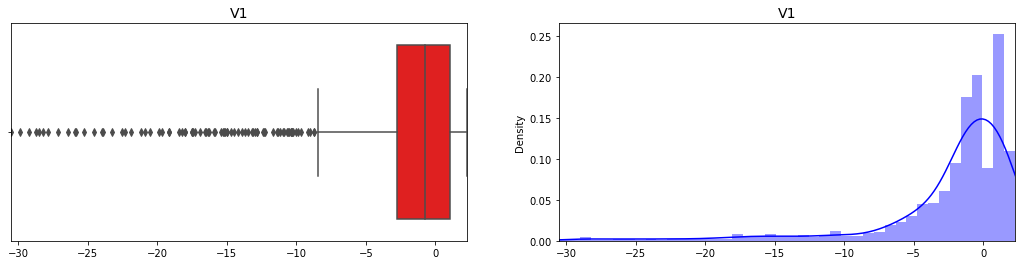

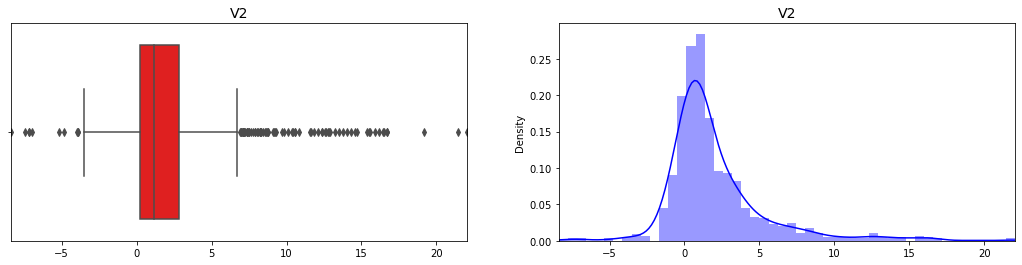

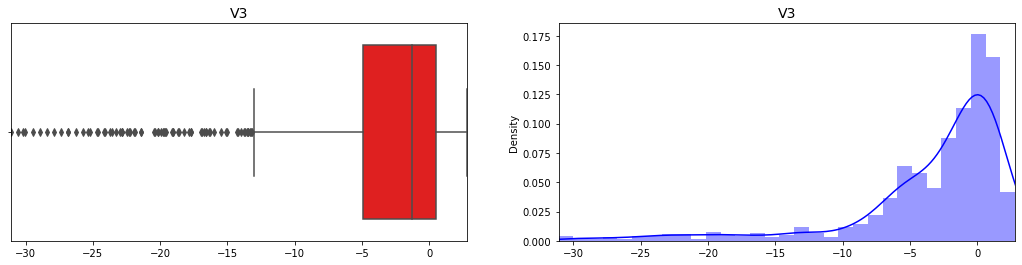

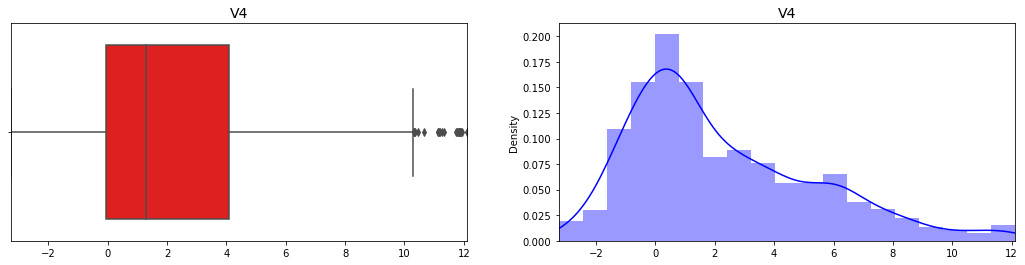

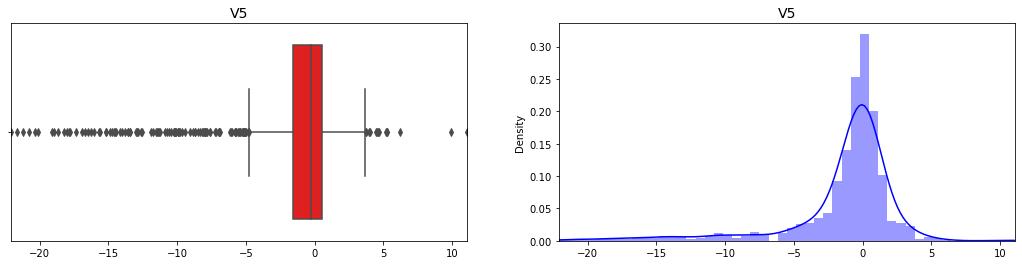

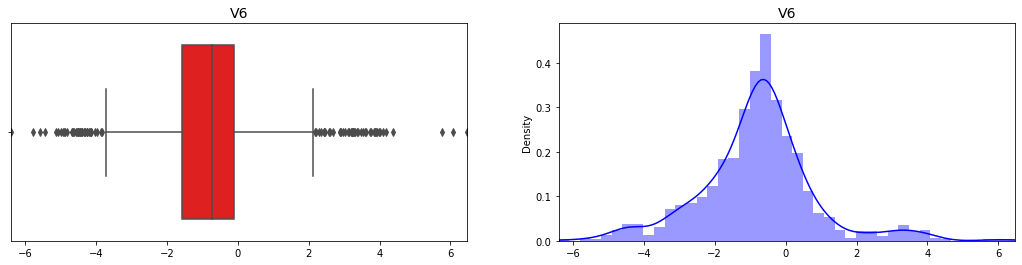

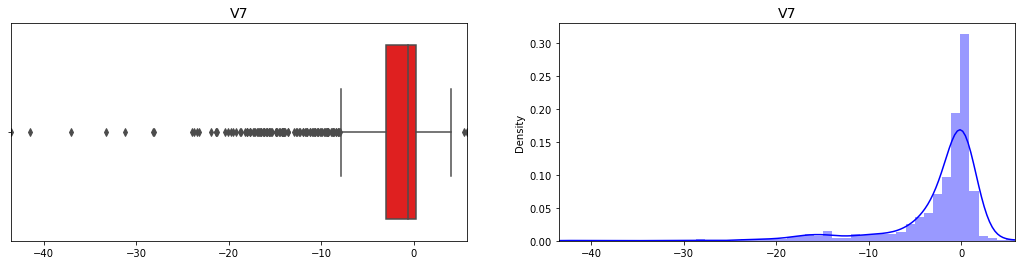

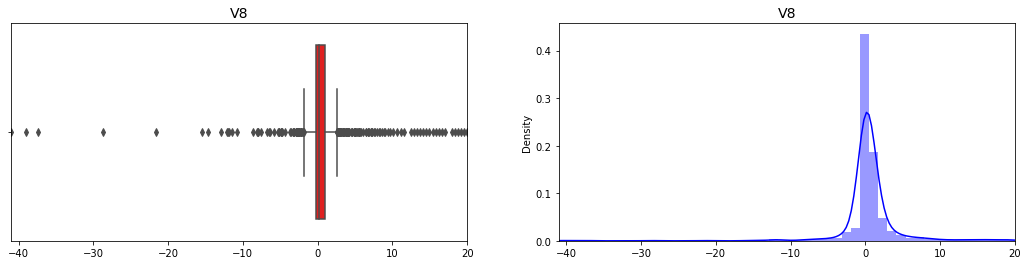

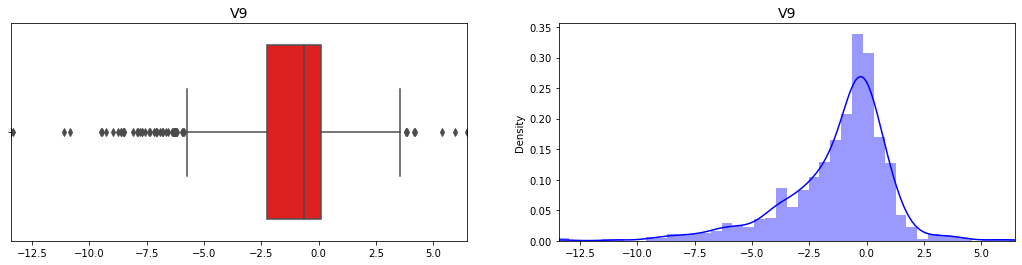

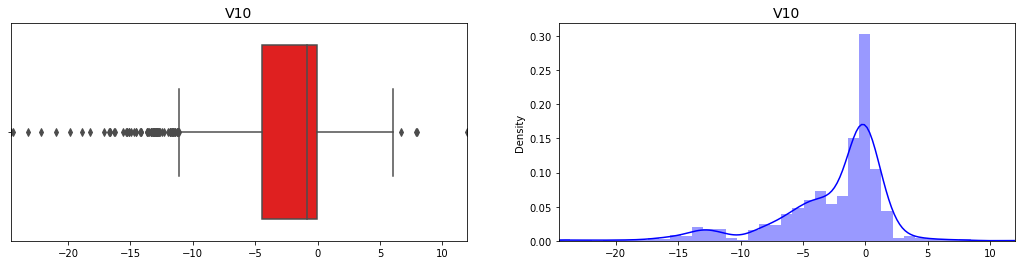

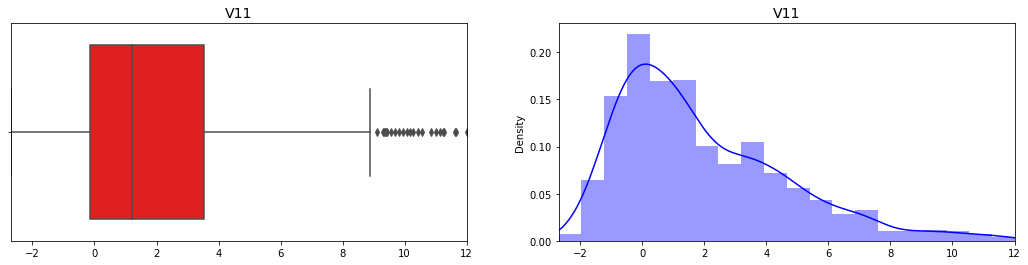

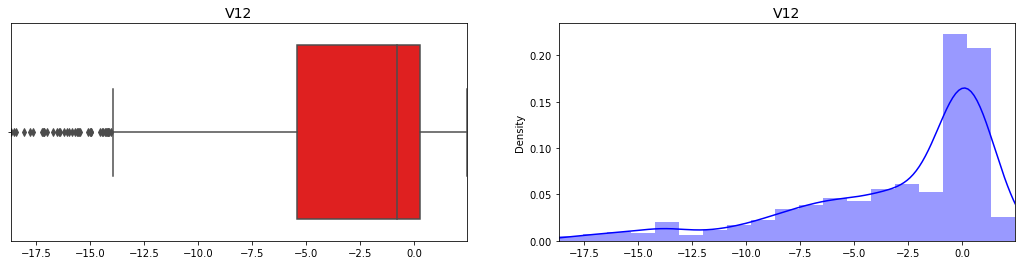

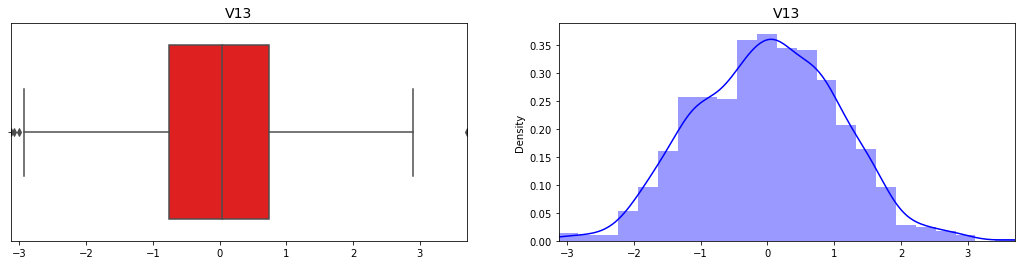

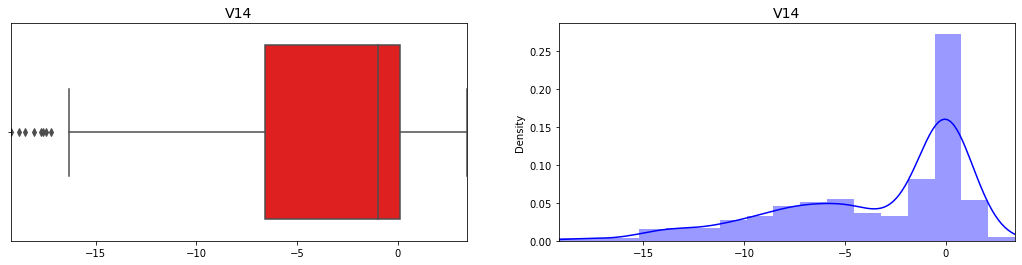

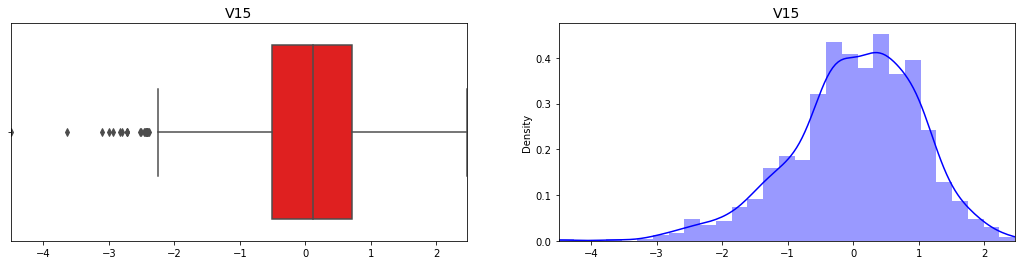

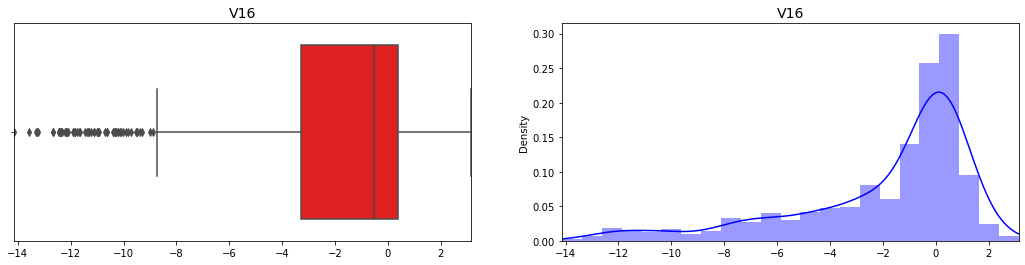

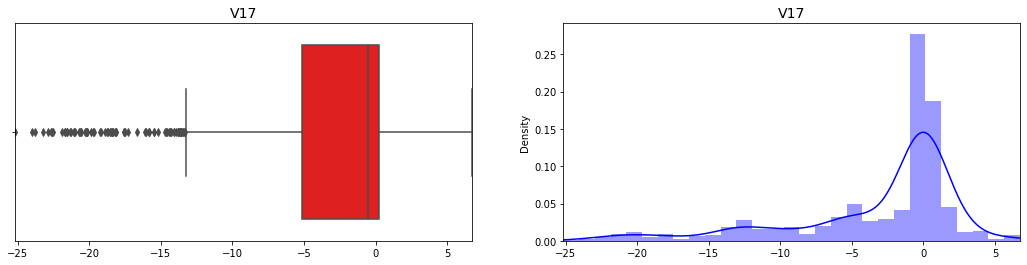

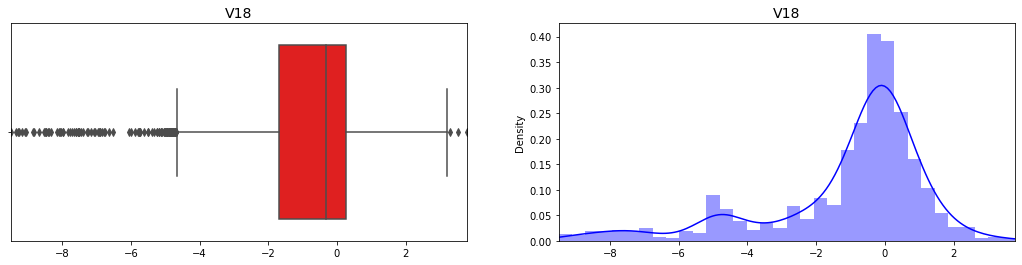

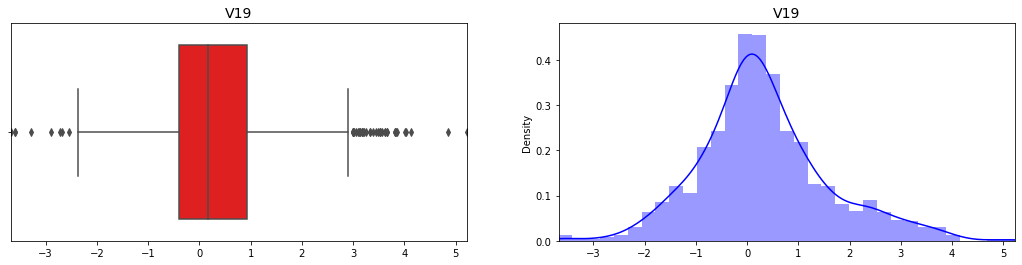

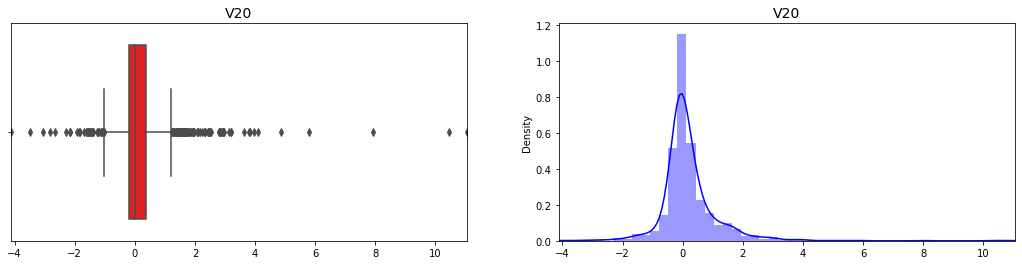

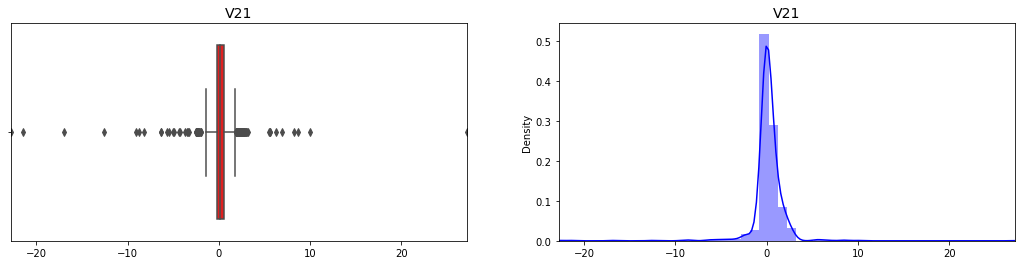

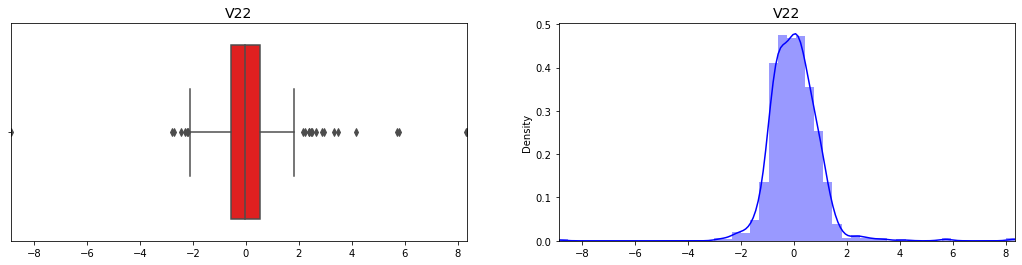

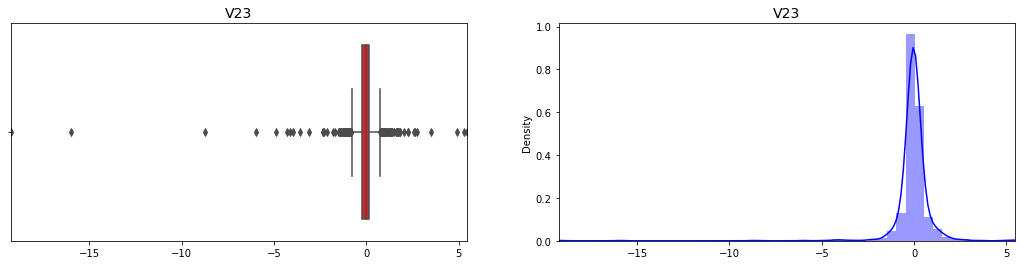

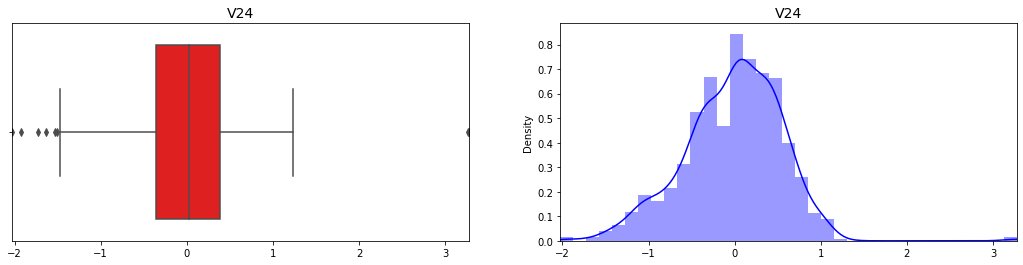

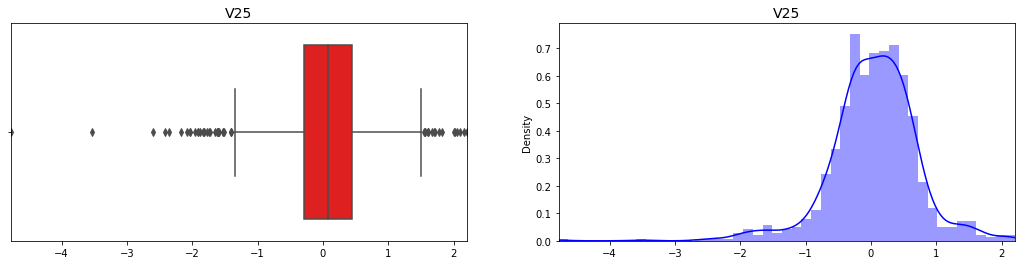

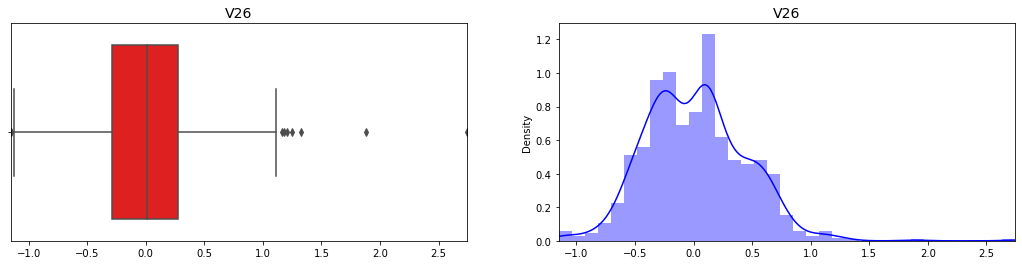

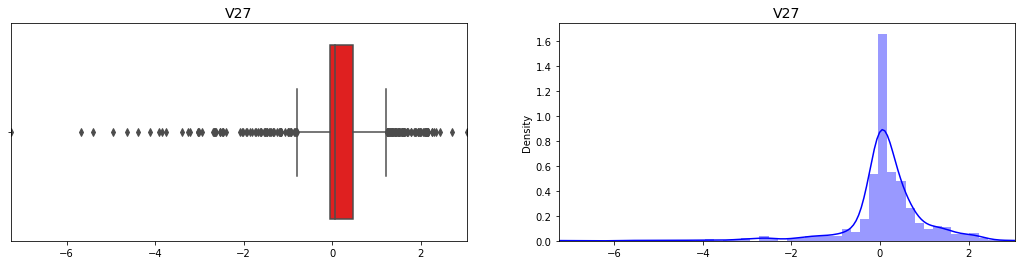

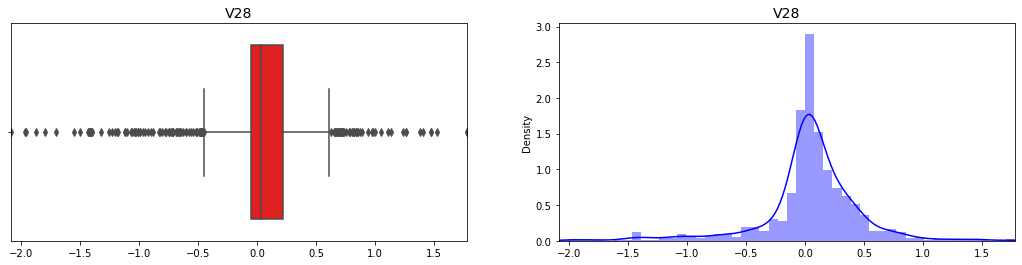

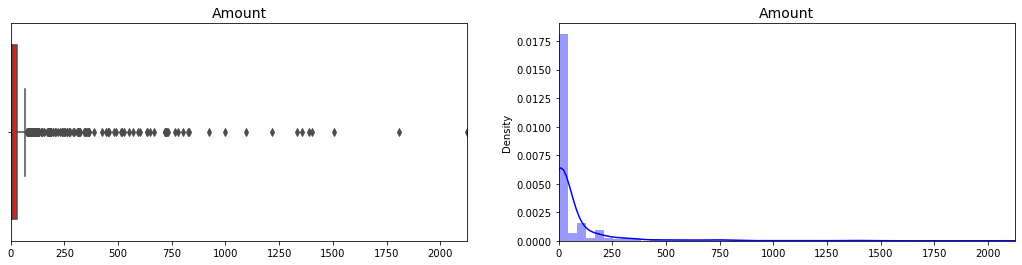

In [42]:
for val in colum:
    conti_u(val)

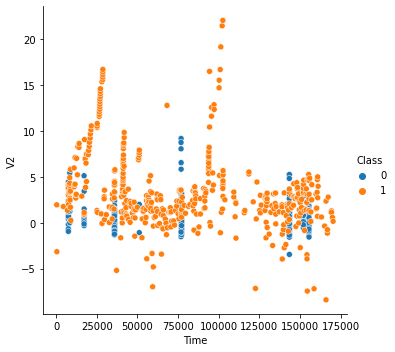

In [43]:
sn.relplot(x='Time',y='V2',data=X_undersampled,hue=y_undersampled)
plt.show()

Time vs Class


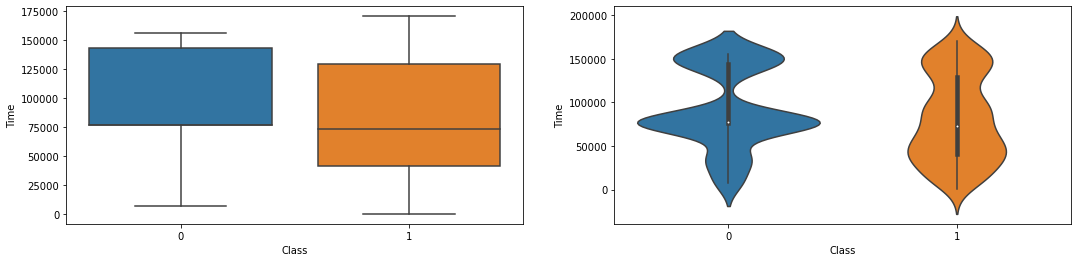

V1 vs Class


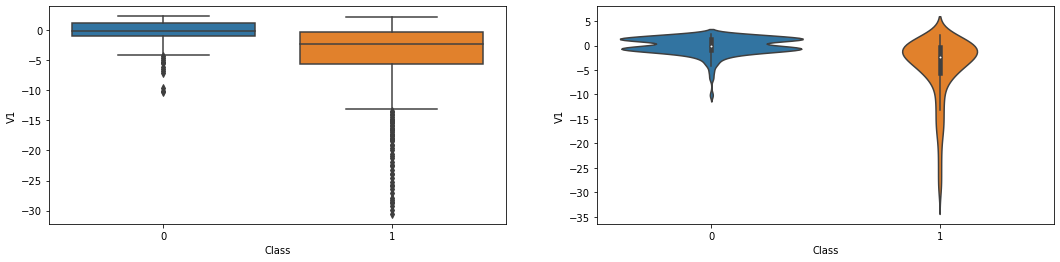

V2 vs Class


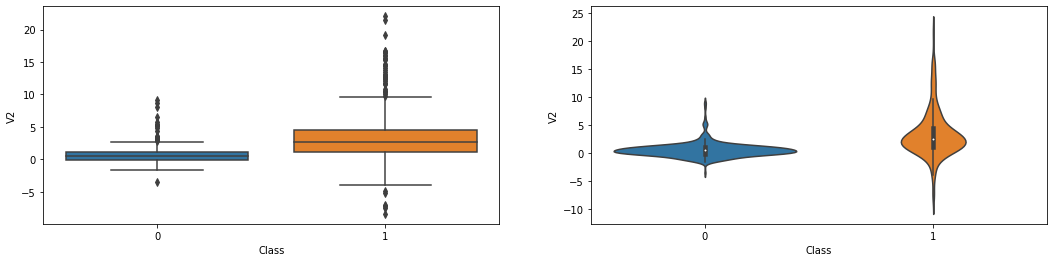

V3 vs Class


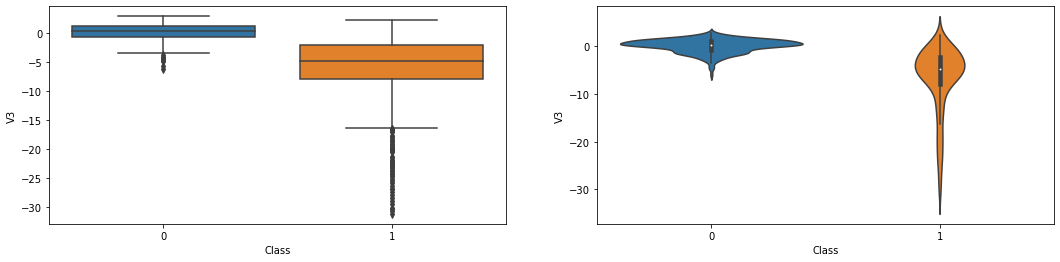

V4 vs Class


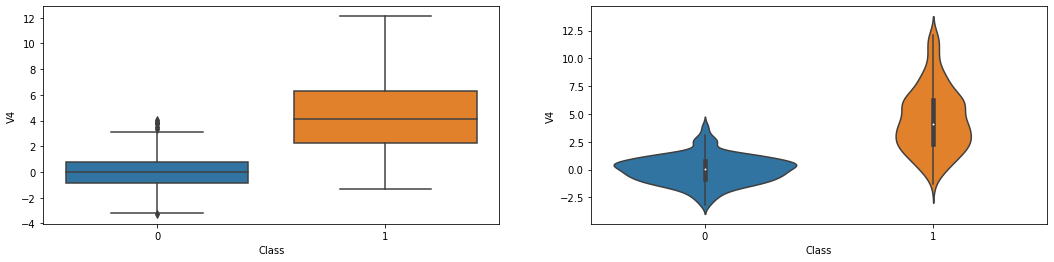

V5 vs Class


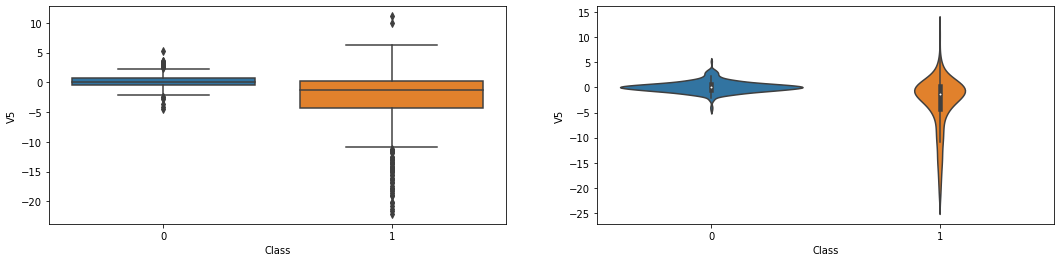

V6 vs Class


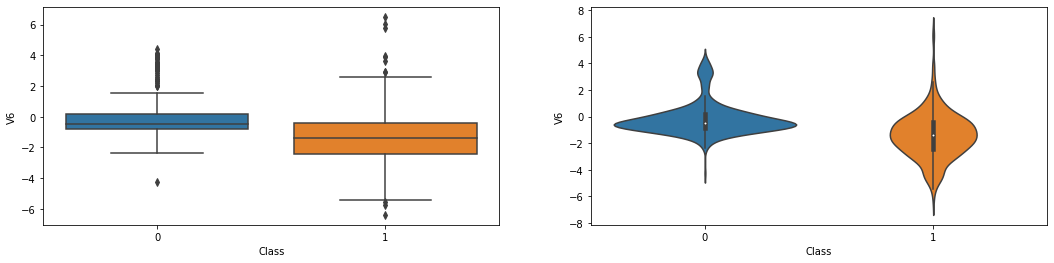

V7 vs Class


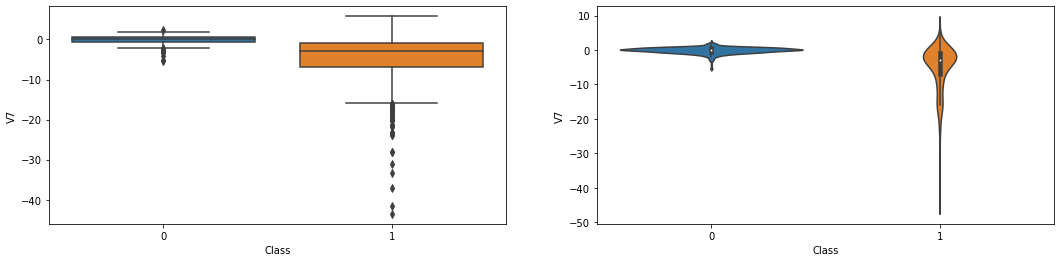

V8 vs Class


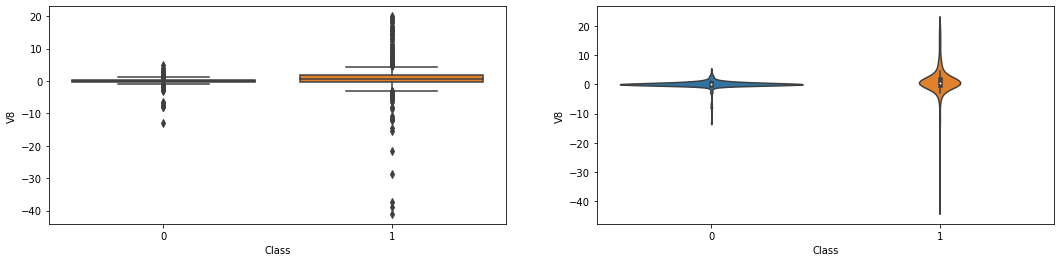

V9 vs Class


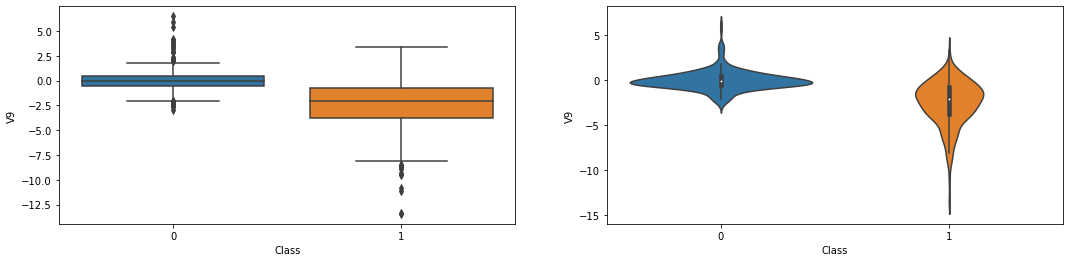

V10 vs Class


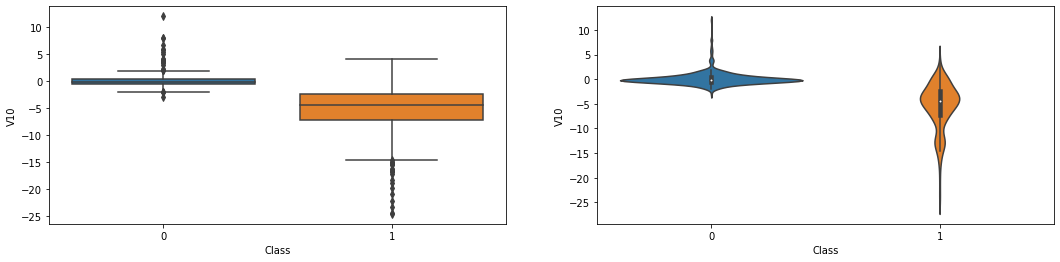

V11 vs Class


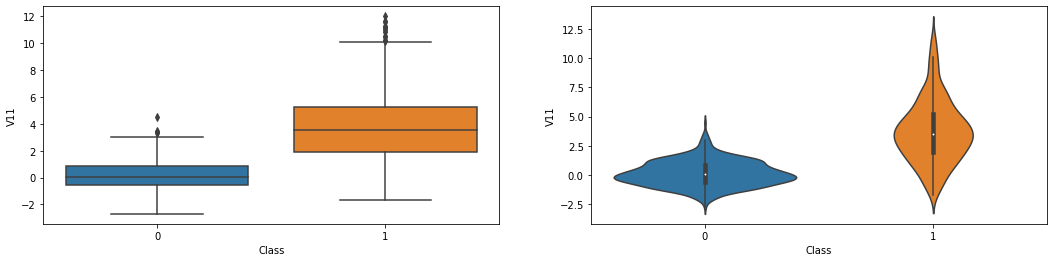

V12 vs Class


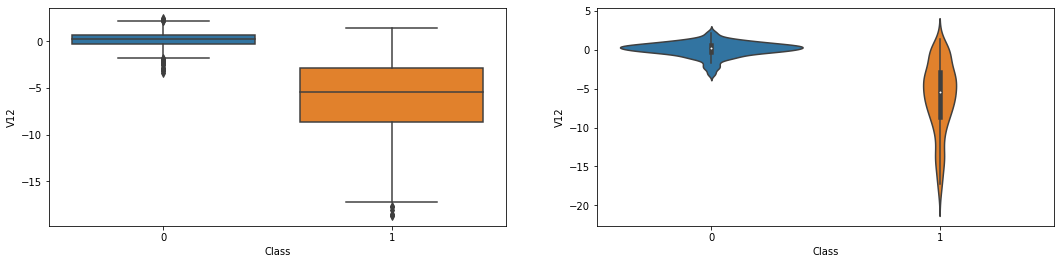

V13 vs Class


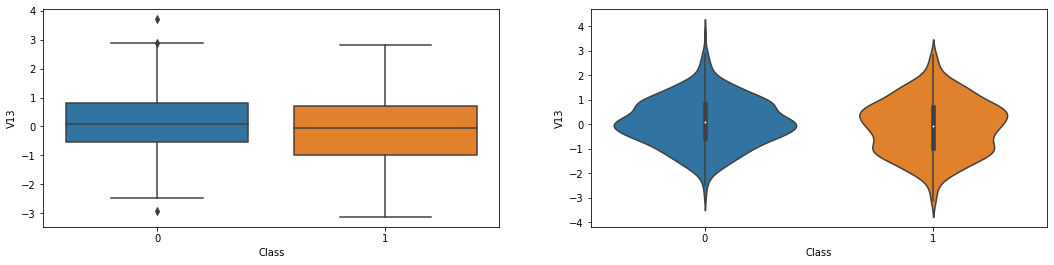

V14 vs Class


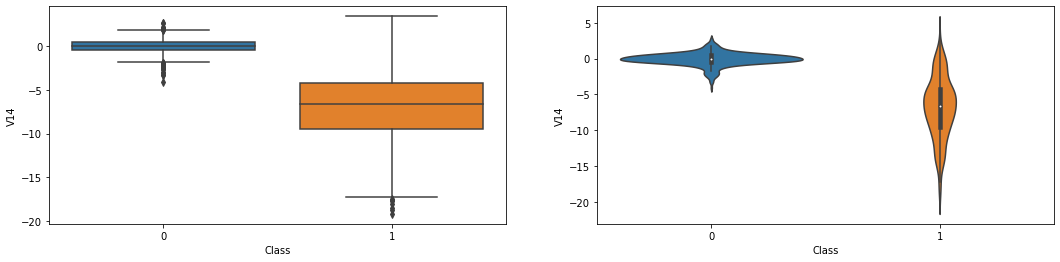

V15 vs Class


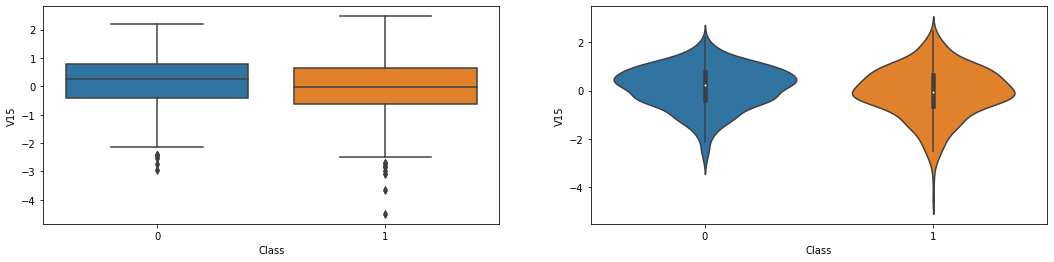

V16 vs Class


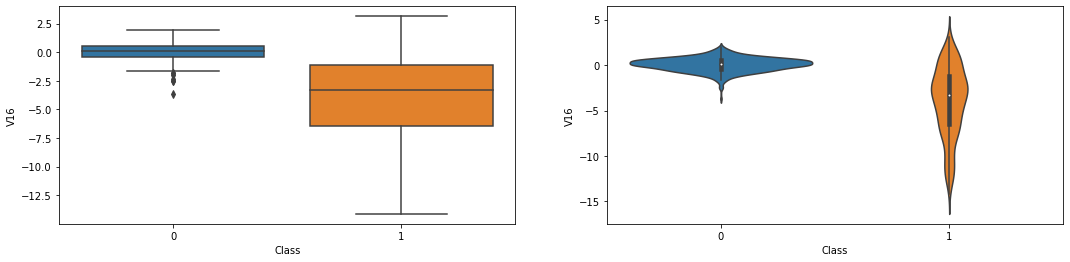

V17 vs Class


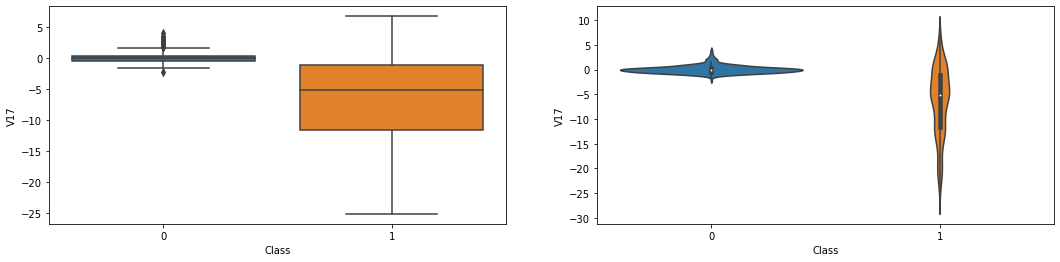

V18 vs Class


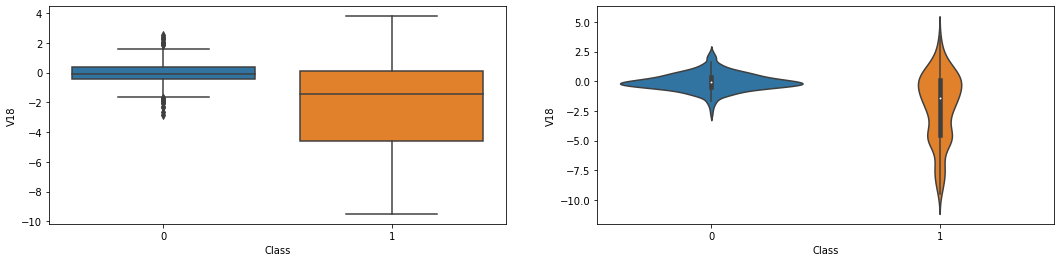

V19 vs Class


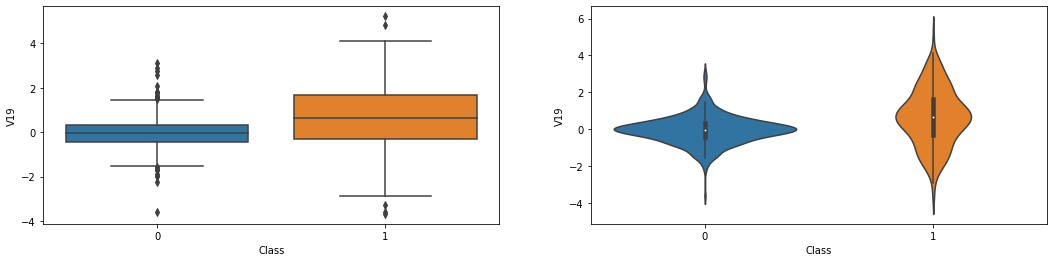

V20 vs Class


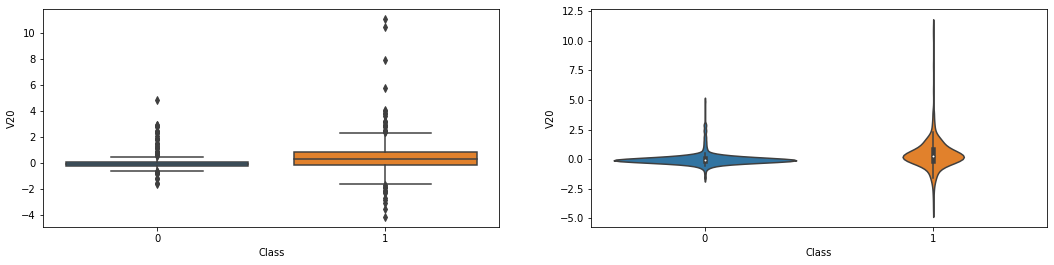

V21 vs Class


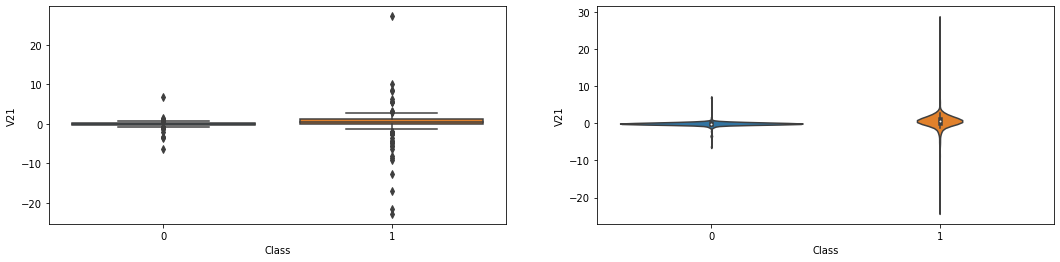

V22 vs Class


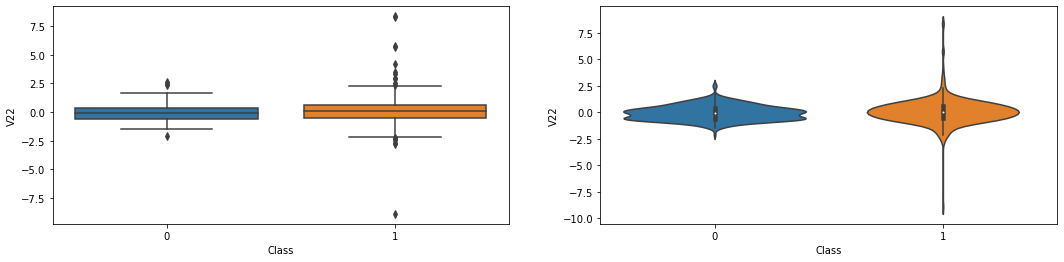

V23 vs Class


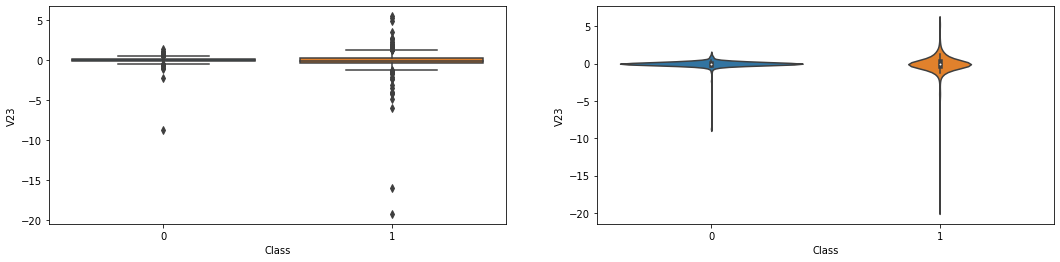

V24 vs Class


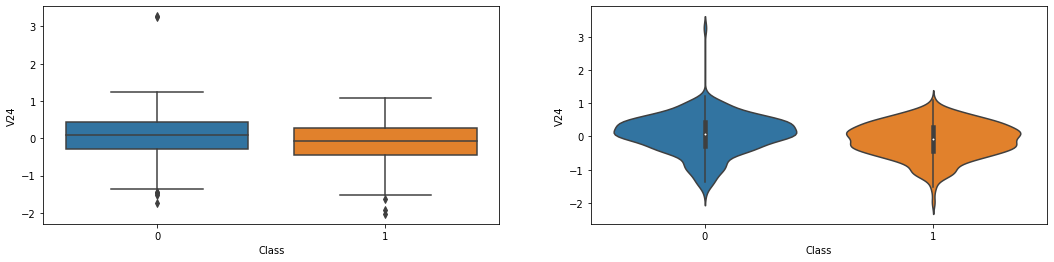

V25 vs Class


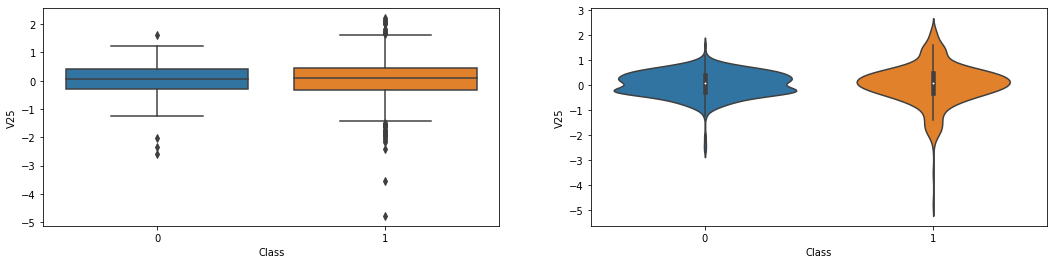

V26 vs Class


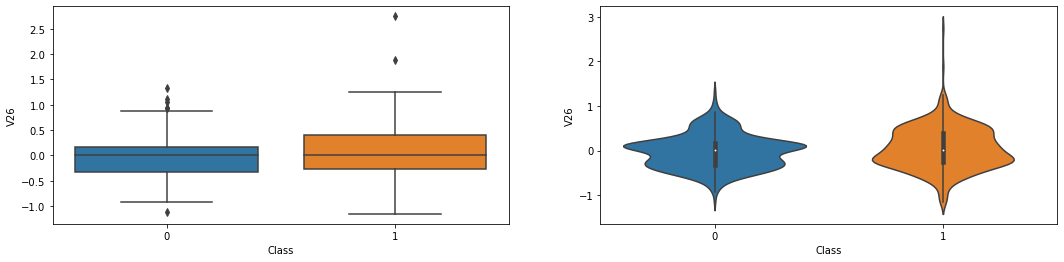

V27 vs Class


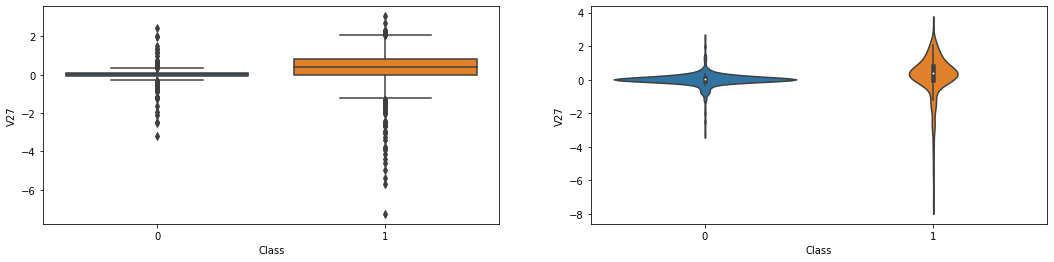

V28 vs Class


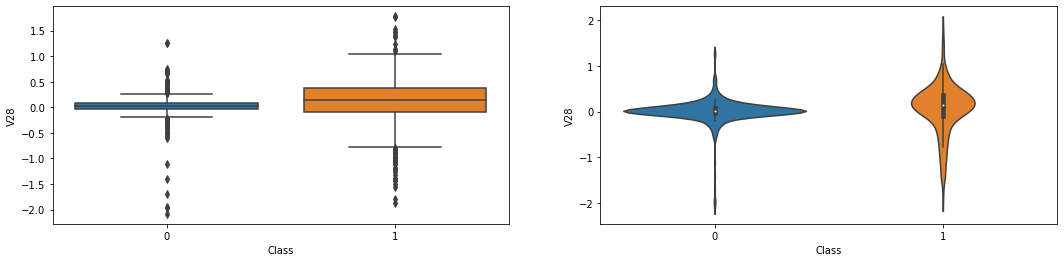

Amount vs Class


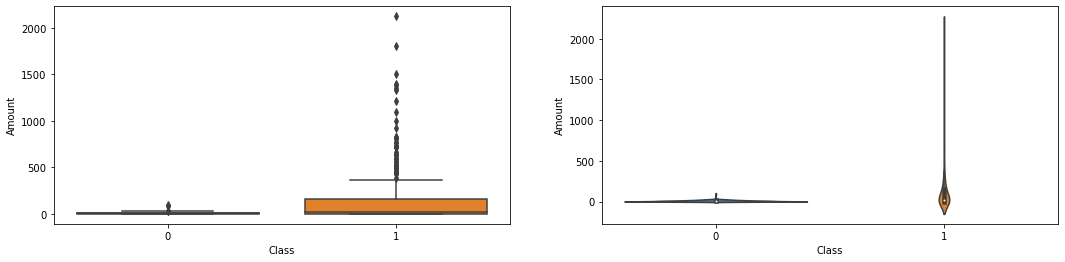

In [44]:
for i in colum:
    val=i
    boxplot_u(val)
    

In [45]:
y_undersampled.value_counts()

0    473
1    473
Name: Class, dtype: int64

In [46]:
y_oversampled.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [47]:
X_oversampled['Time'].mean()

87714.22032575117

In [48]:
X_undersampled['Time'].mean()

86079.07188160677

In [49]:
X_undersampled['Time'].median()

77156.0

In [50]:
X_oversampled['Time'].median()

79384.98379663804

# Train Test Split

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_undersampled,y_undersampled,random_state=101,test_size=0.2)

# OUTLIER TREATMENT

In [52]:
for col in colum:
    q3=x_train[col].quantile(0.75)
    q1=x_train[col].quantile(0.25)
    iqr=x_train[col].quantile(0.75)-x_train[col].quantile(0.25)
    low_limit=q1-(iqr*1.5)
    upp_limit=q3+(iqr*1.5)
    print(col,':minimum_iqr =',round(low_limit,3),'|MINIMUM value',round(x_train[col].min(),3),'|Maximum_iqr =',round(upp_limit,3),'|MAX value',round(x_train[col].max(),3))
    print('*'*80)

Time :minimum_iqr = -107025.875 |MINIMUM value 406.0 |Maximum_iqr = 291489.125 |MAX value 170348.0
********************************************************************************
V1 :minimum_iqr = -8.481 |MINIMUM value -30.552 |Maximum_iqr = 6.817 |MAX value 2.301
********************************************************************************
V2 :minimum_iqr = -3.868 |MINIMUM value -8.402 |Maximum_iqr = 6.975 |MAX value 22.058
********************************************************************************
V3 :minimum_iqr = -12.851 |MINIMUM value -31.104 |Maximum_iqr = 8.473 |MAX value 2.822
********************************************************************************
V4 :minimum_iqr = -6.386 |MINIMUM value -3.262 |Maximum_iqr = 10.499 |MAX value 12.115
********************************************************************************
V5 :minimum_iqr = -4.932 |MINIMUM value -22.106 |Maximum_iqr = 3.879 |MAX value 11.095
***************************************************************

In [53]:
for col in colum:
    q3=x_train[col].quantile(0.75)
    q1=x_train[col].quantile(0.25)
    iqr=x_train[col].quantile(0.75)-x_train[col].quantile(0.25)
    low_limit=q1-(iqr*1.5)
    upp_limit=q3+(iqr*1.5)
    print(col,':minimum_iqr =',round(low_limit,3),'|MINIMUM value',round(x_train[col].min(),3),'|Maximum_iqr =',round(upp_limit,3),'|MAX value',round(x_train[col].max(),3))
    print('*'*80)

Time :minimum_iqr = -107025.875 |MINIMUM value 406.0 |Maximum_iqr = 291489.125 |MAX value 170348.0
********************************************************************************
V1 :minimum_iqr = -8.481 |MINIMUM value -30.552 |Maximum_iqr = 6.817 |MAX value 2.301
********************************************************************************
V2 :minimum_iqr = -3.868 |MINIMUM value -8.402 |Maximum_iqr = 6.975 |MAX value 22.058
********************************************************************************
V3 :minimum_iqr = -12.851 |MINIMUM value -31.104 |Maximum_iqr = 8.473 |MAX value 2.822
********************************************************************************
V4 :minimum_iqr = -6.386 |MINIMUM value -3.262 |Maximum_iqr = 10.499 |MAX value 12.115
********************************************************************************
V5 :minimum_iqr = -4.932 |MINIMUM value -22.106 |Maximum_iqr = 3.879 |MAX value 11.095
***************************************************************

# Checking Normality

In [54]:
print(x_train['Amount'].skew())
print(x_train['Time'].skew())

5.718081903412052
0.17981540495035728


In [55]:
x_train['Amount']=x_train['Amount']**(1/7)

x_test['Amount']=x_test['Amount']**(1/7)

In [56]:
print(x_train['Amount'].skew())

0.634774834203318


In [57]:
x_train

Time         V1        V2         V3         V4        V5        V6  \
856  140293.0   0.951025  3.252926  -5.039105   4.632411  3.014501 -1.349570   
808  110547.0  -1.532810  2.232752  -5.923100   3.386708 -0.153443 -1.419748   
23   155550.0   2.002817  0.135095  -1.685981   0.378513  0.422674 -0.691097   
475    4462.0  -2.303350  1.759247  -0.359745   2.330243 -0.821628 -0.075788   
924  158638.0  -5.976119 -7.196980  -5.388316   5.104799  4.676533 -5.566870   
..        ...        ...       ...        ...        ...       ...       ...   
575   37167.0  -7.923891 -5.198360  -3.000024   4.420666  2.272194 -3.394483   
838  132688.0   0.432554  1.861373  -4.310353   2.448080  4.574094 -2.979912   
337   35931.0  -0.718026  0.654961   2.326659   2.535109  0.223742  1.061155   
523   20332.0 -15.271362  8.326581 -22.338591  11.885313 -8.721334 -2.324307   
863  142409.0  -1.172183  1.661713  -3.049637   2.555058  3.669035 -3.162998   

            V7        V8        V9  ...       V20       V21       V22  \
856   0.980940 -1.819539 -2.099049  ... -0.381444  1.404524 -0.760549   
808  -3.878576  1.444656 -1.465542  ...  0.520840  0.632505 -0.070838   
23    0.113440 -0.109424  0.200032  ... -0.124329 -0.305991 -0.824472   
475   0.562320 -0.399147 -0.238253  ... -0.430022 -0.294166 -0.932391   
924  -4.291180  0.876531 -1.075478  ...  3.136338  1.459369 -0.136262   
..         ...       ...       ...  ...       ...       ...       ...   
575  -5.283435  0.131619  0.658176  ... -2.169811 -0.734308 -0.599926   
838  -2.792379 -2.719867 -0.276704  ...  0.318853 -1.384477 -0.348904   
337  -0.211136  0.382052 -0.478709  ... -0.022339  0.027596  0.279115   
523 -16.196419  0.512882 -6.333685  ...  0.993121 -2.356896  1.068019   
863  -5.985640 -2.179935 -1.120292  ...  0.548106 -0.812098 -0.295361   

          V23       V24       V25       V26       V27       V28    Amount  
856  0.358292 -1.185942 -1.286177  0.000365  0.169662  0.108276  0.963351  
808 -0.490291 -0.359983  0.050678  1.095671  0.471741 -0.106667  0.961553  
23   0.339682  0.655348 -0.313065  0.141584 -0.064749 -0.032842  1.375798  
475  0.172726 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  2.187822  
924  0.848177 -0.269916 -1.095060 -0.710905  0.565846 -1.034107  2.254456  
..        ...       ...       ...       ...       ...       ...       ...  
575 -4.908301  0.410170 -1.167660  0.520508  1.937421 -1.552593  1.431367  
838 -3.979948 -0.828156 -2.419446 -0.767070  0.387039  0.319402  1.000000  
337  0.098260 -0.469864 -0.481874  0.086144  0.089164  0.150961  1.172147  
523  1.085617 -1.039797 -0.182006  0.649921  2.149247 -1.406811  1.000000  
863 -5.988806  0.714381 -1.600024 -0.634783  0.822713  0.494375  1.104090  

[756 rows x 30 columns]

# Scaling

In [58]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train['Time']=sc.fit_transform(x_train[['Time']])
x_test['Time']=sc.transform(x_test[['Time']])

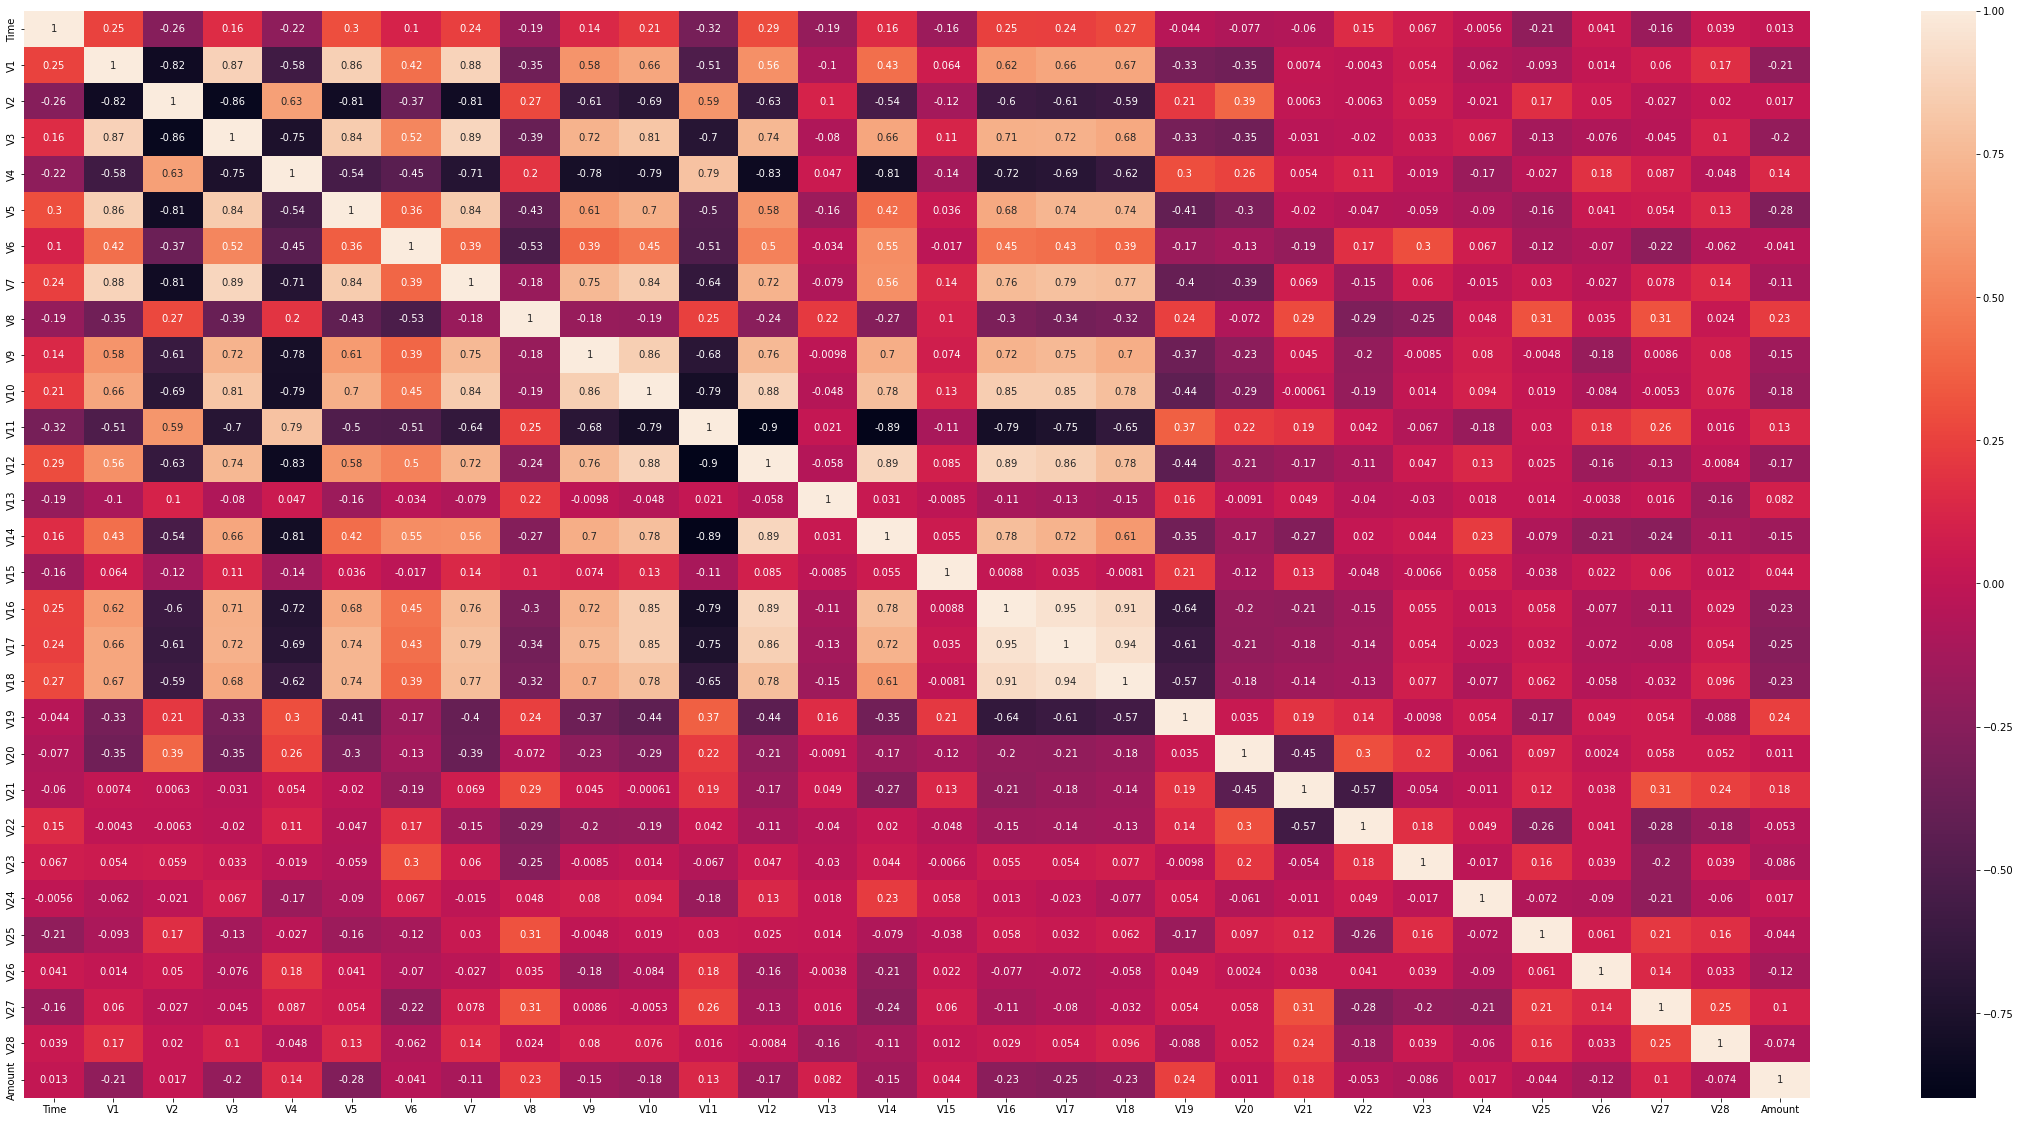

In [59]:
plt.figure(figsize=(40,20))
sn.heatmap(x_train.corr(),annot=True)
plt.show()

# DEFINATIONS For MACHINE LEARNING ALGORITHMS

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm  import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble  import AdaBoostClassifier
from sklearn.ensemble  import GradientBoostingClassifier
from  xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve

from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix
from sklearn.model_selection import cross_val_score


from feature_engine.outliers import Winsorizer

import seaborn as sn
import matplotlib.pyplot as plt

In [61]:
#import matplotlib.pyplot as plt
#import seaborn as sn
def ML_models(model):
    model.fit(x_train,y_train)
    X_prediction=model.predict(x_train)
    X_prediction_test=model.predict(x_test)
    print("ACCURACY","*"*20)
    print("train:-",accuracy_score(y_train,X_prediction))
    print("test:-",accuracy_score(y_test,X_prediction_test))
    print("Cross VAl SCore","*"*20)
    sores=cross_val_score(model,X_undersampled,y_undersampled,cv=5)
    print('cv_score:',sores)
    print(sores.mean())
    print("confusion Matrix","*"*20)    
    
    print(confusion_matrix(y_test,X_prediction_test))
    plot_confusion_matrix(model,x_test,y_test)
    print("classification report","*"*20)
    print(classification_report(y_test,X_prediction_test)) 

In [62]:
comparison_dic={}
# for comparing between model
def modelcomparison(model,name):
    sores=cross_val_score(model,X_undersampled,y_undersampled,cv=5)
    print('cv_score:',sores)
    print(sores.mean())
    X_prediction_test=model.predict(x_test)

    sores=cross_val_score(model,X_undersampled,y_undersampled,cv=5)

    fpr, tpr, _ = roc_curve(y_test, X_prediction_test)
    comparison_dic[name] = [
        accuracy_score(y_test,X_prediction_test ),
        precision_score(y_test, X_prediction_test),
        recall_score(y_test, X_prediction_test),
        sores.mean()
    ]

# APPLYING MACHINE LEARNING

logistic regression
ACCURACY ********************
train:- 0.9563492063492064
test:- 0.9631578947368421
Cross VAl SCore ********************
cv_score: [0.95789474 0.95238095 0.93650794 0.96296296 0.91005291]
0.9439598997493734
confusion Matrix ********************
[[93  2]
 [ 5 90]]
classification report ********************
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        95
           1       0.98      0.95      0.96        95

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190

cv_score: [0.95789474 0.95238095 0.93650794 0.96296296 0.91005291]
0.9439598997493734


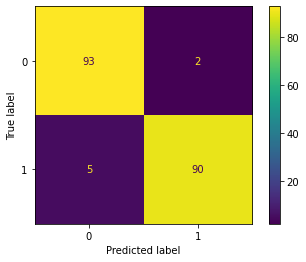

In [63]:
print('logistic regression')
#logistic regression
model4_b=LogisticRegression(random_state=101)
ML_models(model4_b)


name='LR_b'
#creating a comparison between models
modelcomparison(model4_b,name)

In [64]:
from sklearn.model_selection import GridSearchCV
estimator = LogisticRegression(random_state=101)

param_grid = {
    'max_iter': [100,200,110],
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    'solver': ['lbfgs', 'liblinear']}

lr_clf = GridSearchCV(estimator,
                      param_grid,
                      scoring='accuracy',
                      cv=5)


print(lr_clf.fit(x_train, y_train))

print(lr_clf.best_params_)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=101),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9],
                         'max_iter': [100, 200, 110], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')
{'C': 0.7, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


logistic regression
ACCURACY ********************
train:- 0.9537037037037037
test:- 0.9631578947368421
Cross VAl SCore ********************
cv_score: [0.97368421 0.95238095 0.91005291 0.96296296 0.91005291]
0.9418267891952101
confusion Matrix ********************
[[93  2]
 [ 5 90]]
classification report ********************
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        95
           1       0.98      0.95      0.96        95

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190

cv_score: [0.97368421 0.95238095 0.91005291 0.96296296 0.91005291]
0.9418267891952101


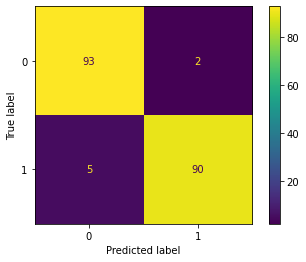

In [65]:
print('logistic regression')
#logistic regression
model4=LogisticRegression(C=0.7, random_state=101,max_iter= 100, penalty='l2', solver= 'lbfgs')
ML_models(model4)
name='LR'
#creating a comparison between models
modelcomparison(model4,name)

KNN
ACCURACY ********************
train:- 0.9497354497354498
test:- 0.9473684210526315
Cross VAl SCore ********************
cv_score: [0.44210526 0.67724868 0.76190476 1.         0.5026455 ]
0.6767808409913674
confusion Matrix ********************
[[94  1]
 [ 9 86]]
classification report ********************
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        95
           1       0.99      0.91      0.95        95

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

********************************************************************************
cv_score: [0.44210526 0.67724868 0.76190476 1.         0.5026455 ]
0.6767808409913674


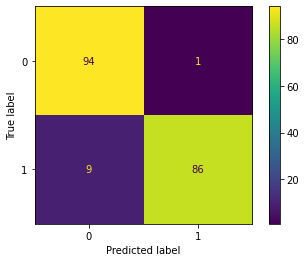

In [66]:
#KNN
print('KNN')
model5_b=KNeighborsClassifier()
ML_models(model5_b)
print('*'*80)

name='Knn_b'
#creating a comparison between models
modelcomparison(model5_b,name)

In [67]:
#KNN
#gridcv search
from sklearn.model_selection import GridSearchCV
estimator=KNeighborsClassifier()
param_grid = {"n_neighbors":list(range(1,10)),"weights":['uniform', 'distance'],"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],"p":[1,2,3,4,5]}
full_cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
print(full_cv_classifier.fit(x_train,y_train))
print(full_cv_classifier.best_params_)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')
{'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}


KNN
ACCURACY ********************
train:- 1.0
test:- 0.9421052631578948
Cross VAl SCore ********************
cv_score: [0.59473684 0.58730159 0.76190476 1.         0.51322751]
0.6914341409078251
confusion Matrix ********************
[[94  1]
 [10 85]]
classification report ********************
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        95
           1       0.99      0.89      0.94        95

    accuracy                           0.94       190
   macro avg       0.95      0.94      0.94       190
weighted avg       0.95      0.94      0.94       190

********************************************************************************
cv_score: [0.59473684 0.58730159 0.76190476 1.         0.51322751]
0.6914341409078251


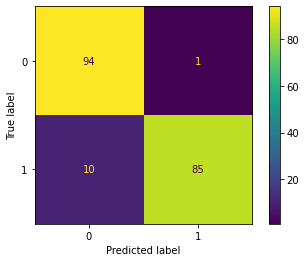

In [68]:
#KNN
print('KNN')
model5=KNeighborsClassifier(n_neighbors=6, p=1,weights='distance',algorithm='auto')
ML_models(model5)
print('*'*80)

name='Knn'
#creating a comparison between models
modelcomparison(model5,name)

DT
ACCURACY ********************
train:- 1.0
test:- 0.9736842105263158
Cross VAl SCore ********************
cv_score: [0.95789474 0.94708995 0.92063492 0.97354497 0.91534392]
0.9429016986911722
confusion Matrix ********************
[[91  4]
 [ 1 94]]
classification report ********************
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        95
           1       0.96      0.99      0.97        95

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190

********************************************************************************
cv_score: [0.95789474 0.94708995 0.92063492 0.97354497 0.91534392]
0.9429016986911722


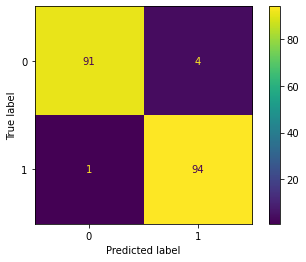

In [69]:
#DT
print('DT')
model7_b=DecisionTreeClassifier(random_state=101)
ML_models(model7_b)
print('*'*80)

name='DT_b'
#creating a comparison between models
modelcomparison(model7_b,name)

In [70]:
#GRIDCV SEARCH
from sklearn.model_selection import GridSearchCV
estimator=DecisionTreeClassifier(random_state=101)
param_grid = {"criterion":["gini", "entropy"],
              "splitter":["best", "random"],
              "max_depth":list(range(3,15)),
              "min_samples_leaf":list(range(3,25)),"max_leaf_nodes":list(range(3,11))}
full_cv_classifier=GridSearchCV(estimator,param_grid,cv=5)
print(full_cv_classifier.fit(x_train,y_train))
print(full_cv_classifier.best_estimator_)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                              13, 14, 15, 16, 17, 18, 19, 20,
                                              21, 22, 23, 24],
                         'splitter': ['best', 'random']})
DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=10,
                       min_samples_leaf=7, random_state=101)


DT
ACCURACY ********************
train:- 0.9708994708994709
test:- 0.9736842105263158
Cross VAl SCore ********************
cv_score: [0.97368421 0.95238095 0.92592593 0.96296296 0.91005291]
0.9450013923698133
confusion Matrix ********************
[[93  2]
 [ 3 92]]
classification report ********************
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.98      0.97      0.97        95

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190

********************************************************************************
cv_score: [0.97368421 0.95238095 0.92592593 0.96296296 0.91005291]
0.9450013923698133


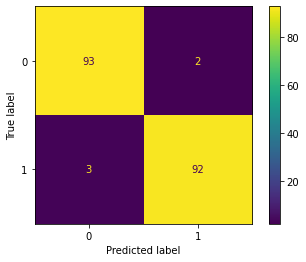

In [71]:
#DT
print('DT')
model7=DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=10,
                       min_samples_leaf=7, random_state=101)
ML_models(model7)
print('*'*80)

name='DT'
#creating a comparison between models
modelcomparison(model7,name)

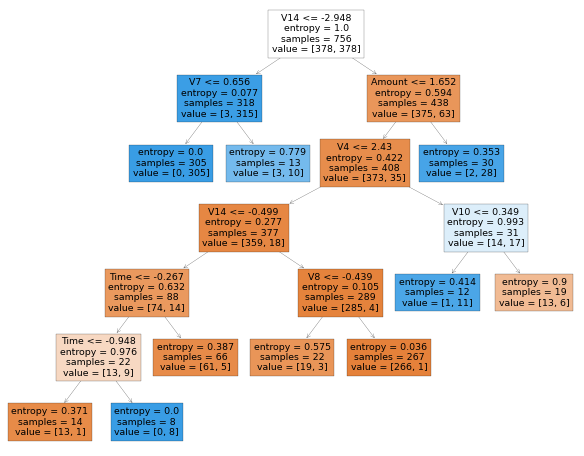

In [72]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,40),dpi=15)
plot_tree(model7,filled=True,feature_names=X.columns)
plt.show()

RF
ACCURACY ********************
train:- 1.0
test:- 0.9736842105263158
Cross VAl SCore ********************
cv_score: [0.96842105 0.95238095 0.94179894 0.96825397 0.94179894]
0.9545307713728766
confusion Matrix ********************
[[94  1]
 [ 4 91]]
classification report ********************
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.99      0.96      0.97        95

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190

********************************************************************************
cv_score: [0.97368421 0.96296296 0.94179894 0.96825397 0.94179894]
0.9576998050682262


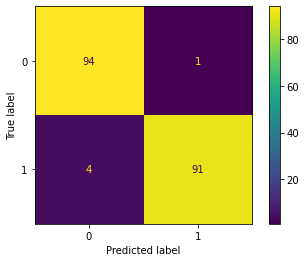

In [73]:
#RF
print('RF')
model8_b=RandomForestClassifier()
ML_models(model8_b)
print('*'*80)

name='RF_b'
#creating a comparison between models
modelcomparison(model8_b,name)

In [74]:
#RF
#GRIDCV SEARCH
from sklearn.model_selection import GridSearchCV
estimator=RandomForestClassifier(random_state=101)
param_grid = {"criterion":["gini", "entropy"],
              "n_estimators":list(range(1,20)),
              "max_depth":list(range(3,20)),"max_leaf_nodes":list(range(3,11))}
full_cv_classifier=GridSearchCV(estimator,param_grid,cv=5)
print(full_cv_classifier.fit(x_train,y_train))
print(full_cv_classifier.best_estimator_)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19],
                         'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]})
RandomForestClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=10,
                       n_estimators=19, random_state=101)


RF
ACCURACY ********************
train:- 0.9708994708994709
test:- 0.9736842105263158
Cross VAl SCore ********************
cv_score: [0.96842105 0.95238095 0.94179894 0.96296296 0.92592593]
0.9502979671400723
confusion Matrix ********************
[[95  0]
 [ 5 90]]
classification report ********************
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        95
           1       1.00      0.95      0.97        95

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190

********************************************************************************
cv_score: [0.96842105 0.95238095 0.94179894 0.96296296 0.92592593]
0.9502979671400723


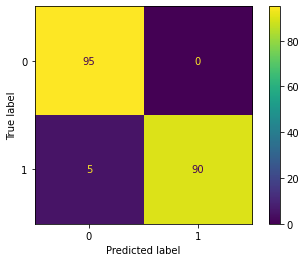

In [75]:
#RF
print('RF')
model8=RandomForestClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=10,
                       n_estimators=19, random_state=101)
ML_models(model8)
print('*'*80)

name='RF'
#creating a comparison between models
modelcomparison(model8,name)

ADA
ACCURACY ********************
train:- 1.0
test:- 0.9842105263157894
Cross VAl SCore ********************
cv_score: [0.95263158 0.96296296 0.93650794 0.96825397 0.83597884]
0.9312670565302146
confusion Matrix ********************
[[95  0]
 [ 3 92]]
classification report ********************
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        95
           1       1.00      0.97      0.98        95

    accuracy                           0.98       190
   macro avg       0.98      0.98      0.98       190
weighted avg       0.98      0.98      0.98       190

********************************************************************************
cv_score: [0.95263158 0.96296296 0.93650794 0.96825397 0.83597884]
0.9312670565302146


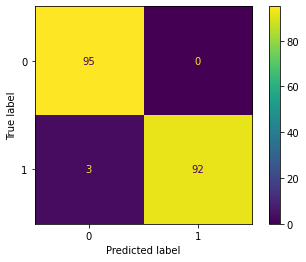

In [76]:
#ADA
print('ADA')
model9_b=AdaBoostClassifier()
ML_models(model9_b)
print('*'*80)

name='ADA_b'
#creating a comparison between models
modelcomparison(model9_b,name)

In [86]:
#ADA
#GRIDCV SEARCH
from sklearn.model_selection import GridSearchCV
estimator=AdaBoostClassifier()
param_grid={'n_estimators':list(range(1,100)),'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6]}
full_cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
print(full_cv_classifier.fit(x_train,y_train))
print(full_cv_classifier.best_params_)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4,
                                           1.5, 1.6],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')
{'learning_rate': 0.5, 'n_estimators': 72}


ADA
ACCURACY ********************
train:- 1.0
test:- 0.9842105263157894
Cross VAl SCore ********************
cv_score: [0.95263158 0.96296296 0.94179894 0.95767196 0.86772487]
0.9365580618212197
confusion Matrix ********************
[[95  0]
 [ 3 92]]
classification report ********************
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        95
           1       1.00      0.97      0.98        95

    accuracy                           0.98       190
   macro avg       0.98      0.98      0.98       190
weighted avg       0.98      0.98      0.98       190

********************************************************************************
cv_score: [0.95263158 0.96296296 0.94179894 0.95767196 0.86772487]
0.9365580618212197


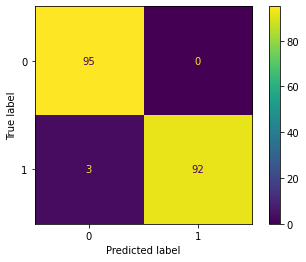

In [87]:
#ADA
print('ADA')
model9=AdaBoostClassifier(learning_rate=0.5, n_estimators=72)
ML_models(model9)
print('*'*80)

name='ADA'
#creating a comparison between models
modelcomparison(model9,name)

XGB
ACCURACY ********************
train:- 1.0
test:- 0.9736842105263158
Cross VAl SCore ********************
cv_score: [0.95789474 0.95767196 0.94179894 0.96296296 0.91534392]
0.9471345029239766
confusion Matrix ********************
[[93  2]
 [ 3 92]]
classification report ********************
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.98      0.97      0.97        95

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190

********************************************************************************
cv_score: [0.95789474 0.95767196 0.94179894 0.96296296 0.91534392]
0.9471345029239766


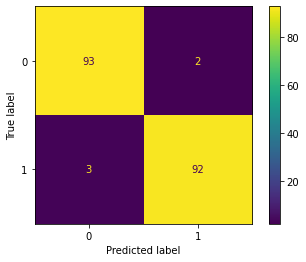

In [88]:
#XGB
print('XGB')
model11_b=XGBClassifier()
ML_models(model11_b)
print('*'*80)

name='XG_b'
#creating a comparison between models
modelcomparison(model11_b,name)

In [89]:
#XGB
#GRIDCV SEARCH
from sklearn.model_selection import GridSearchCV
estimator=XGBClassifier()
param_grid={'n_estimators':[1,5,10,20,40,100],'max_depth':[3,4,5,6],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
full_cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
print(full_cv_classifier.fit(x_train,y_train))
print(full_cv_classifier.best_params_)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

XGB
ACCURACY ********************
train:- 1.0
test:- 0.968421052631579
Cross VAl SCore ********************
cv_score: [0.96315789 0.95767196 0.95238095 0.96296296 0.91005291]
0.949245335561125
confusion Matrix ********************
[[92  3]
 [ 3 92]]
classification report ********************
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        95
           1       0.97      0.97      0.97        95

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190

********************************************************************************
cv_score: [0.96315789 0.95767196 0.95238095 0.96296296 0.91005291]
0.949245335561125


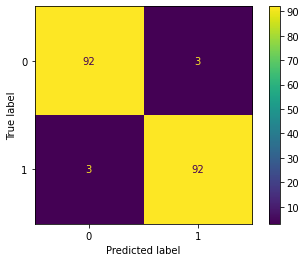

In [90]:
#XGB
print('XGB')
model11=XGBClassifier(gamma=0.8,n_estimators=20,max_depth=6)
ML_models(model11)
print('*'*80)



name='XGB'
#creating a comparison between models
modelcomparison(model11,name)

# ANALYSING THE MODELS

In [91]:
comparison_matrix = {}
for key, value in comparison_dic.items():
    comparison_matrix[str(key)] = value[0:4]

comparison_df = pd.DataFrame(comparison_matrix,
                             index=['Accuracy', 'Precision', 'Recall', 'cv_Score']).T
comparison_df.style.highlight_max(color='indianred', axis=0)

## According to the given question, we don't have to see the accuracy of the model, but we have to focus on the recall value of the model.i.e their should be minimum number of defaulters.

DT
ACCURACY ********************
train:- 1.0
test:- 0.9736842105263158
Cross VAl SCore ********************
cv_score: [0.95789474 0.94708995 0.92063492 0.97354497 0.91534392]
0.9429016986911722
confusion Matrix ********************
[[91  4]
 [ 1 94]]
classification report ********************
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        95
           1       0.96      0.99      0.97        95

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190

********************************************************************************
cv_score: [0.95789474 0.94708995 0.92063492 0.97354497 0.91534392]
0.9429016986911722


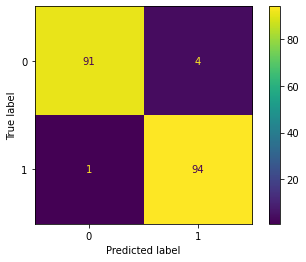

In [92]:
#Best model
#DT
print('DT')
model7_b=DecisionTreeClassifier(random_state=101)
ML_models(model7_b)
print('*'*80)

name='DT_b'
#creating a comparison between models
modelcomparison(model7_b,name)

# Model deployment

In [ ]:
#import pickle

In [ ]:
#pickle.dump(model11,open('model.pkl','wb'))